In [76]:
import os
import sys
import time
import calendar
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy as sp
from scipy import stats
import tensorflow as tf

from my_lib.field_config import data_encoder

In [9]:
os.listdir("generated_data/")

['.DS_Store',
 'gen_num_layers_dec_4-d_model_64-num_heads_4-i_0-dr_0__1-dff_64-opt_adam-l_loss_mse_lw2--vf1-len_80.csv',
 '.ipynb_checkpoints']

# Set datasets

In [10]:
gen_df = pd.read_csv("generated_data/gen_num_layers_dec_4-d_model_64-num_heads_4-i_0-dr_0__1-dff_64-opt_adam-l_loss_mse_lw2--vf1-len_80.csv")
gen_df

,Unnamed: 0,amount,tcode_nums,date_fields,days_passed,age,date,account_id
0,0,145.759995,4,04/18,2,66,2021-04-18,0
1,1,115.199997,12,04/18,0,66,2021-04-18,0
2,2,90.959999,12,04/18,0,66,2021-04-18,0
3,3,49.650002,0,04/20,2,66,2021-04-20,0
4,4,58.180000,5,04/22,2,66,2021-04-22,0
...,...,...,...,...,...,...,...,...
324315,324315,39.910000,16,07/12,1,35,2021-07-12,4053
324316,324316,111.900002,12,07/12,0,35,2021-07-12,4053
324317,324317,40.860001,0,07/12,0,35,2021-07-12,4053
324318,324318,35.700001,0,07/14,2,35,2021-07-14,4053


In [11]:
real_df = pd.read_csv("final_df.csv", parse_dates=["dateofbirth","transactiondate", "datetime"])
real_df

,account_id,dateofbirth,totalvalue,transactiondate,transactiontype,transactionmethodtype,sourcefundtype,destinationfundtype,transactionactivitytype,age,tcode,direction,amount,datetime,month,day,dow,year,td
0,1000,1962-10-01,-79.20,2020-06-02 18:09:59,transfer_out,pos,account,eft,NaN,59,transfer_out-pos-account-eft-,db,79.20,2020-06-02,6,2,1,2020,0.0
1,1000,1962-10-01,-31.03,2020-06-03 03:28:25,transfer_out,pos,account,eft,NaN,59,transfer_out-pos-account-eft-,db,31.03,2020-06-03,6,3,2,2020,1.0
2,1000,1962-10-01,22.12,2020-06-03 03:30:47,adjustment,in_branch,account,account,NaN,59,adjustment-in_branch-account-account-,cr,22.12,2020-06-03,6,3,2,2020,0.0
3,1000,1962-10-01,-6.74,2020-06-03 03:53:18,transfer_out,pos,account,eft,NaN,59,transfer_out-pos-account-eft-,db,6.74,2020-06-03,6,3,2,2020,0.0
4,1000,1962-10-01,-11.68,2020-06-03 05:16:13,inquiry,pos,account,account,NaN,59,inquiry-pos-account-account-,db,11.68,2020-06-03,6,3,2,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304838,1999,2006-10-03,-13.89,2021-05-30 21:24:17,transfer_out,pos,account,eft,NaN,15,transfer_out-pos-account-eft-,db,13.89,2021-05-30,5,30,6,2021,0.0
304839,1999,2006-10-03,878.11,2021-05-31 15:48:38,deposit,in_branch,cheque,account,NaN,15,deposit-in_branch-cheque-account-,cr,878.11,2021-05-31,5,31,0,2021,1.0
304840,1999,2006-10-03,392.00,2021-06-01 05:58:25,deposit,system,cheque,account,NaN,15,deposit-system-cheque-account-,cr,392.00,2021-06-01,6,1,1,2021,1.0
304841,1999,2006-10-03,18.89,2021-06-01 23:58:06,deposit,remote_capture,cheque,account,NaN,15,deposit-remote_capture-cheque-account-,cr,18.89,2021-06-01,6,1,1,2021,0.0


### Ensure 'datetime' and 'days_passed' fields are present in both dataframes

In [12]:
# real_df["datetime"] = pd.to_datetime(real_df["date"], format="%y%m%d")

real_df["days_passed"] = real_df["td"]
gen_df["datetime"] = pd.to_datetime(gen_df["date"], format="%Y-%m-%d") 
gen_df["tcode"] = gen_df["tcode_nums"].apply(lambda x: data_encoder.NUM_TO_TCODE[x])

In [13]:
real_df

,account_id,dateofbirth,totalvalue,transactiondate,transactiontype,transactionmethodtype,sourcefundtype,destinationfundtype,transactionactivitytype,age,tcode,direction,amount,datetime,month,day,dow,year,td,days_passed
0,1000,1962-10-01,-79.20,2020-06-02 18:09:59,transfer_out,pos,account,eft,NaN,59,transfer_out-pos-account-eft-,db,79.20,2020-06-02,6,2,1,2020,0.0,0.0
1,1000,1962-10-01,-31.03,2020-06-03 03:28:25,transfer_out,pos,account,eft,NaN,59,transfer_out-pos-account-eft-,db,31.03,2020-06-03,6,3,2,2020,1.0,1.0
2,1000,1962-10-01,22.12,2020-06-03 03:30:47,adjustment,in_branch,account,account,NaN,59,adjustment-in_branch-account-account-,cr,22.12,2020-06-03,6,3,2,2020,0.0,0.0
3,1000,1962-10-01,-6.74,2020-06-03 03:53:18,transfer_out,pos,account,eft,NaN,59,transfer_out-pos-account-eft-,db,6.74,2020-06-03,6,3,2,2020,0.0,0.0
4,1000,1962-10-01,-11.68,2020-06-03 05:16:13,inquiry,pos,account,account,NaN,59,inquiry-pos-account-account-,db,11.68,2020-06-03,6,3,2,2020,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304838,1999,2006-10-03,-13.89,2021-05-30 21:24:17,transfer_out,pos,account,eft,NaN,15,transfer_out-pos-account-eft-,db,13.89,2021-05-30,5,30,6,2021,0.0,0.0
304839,1999,2006-10-03,878.11,2021-05-31 15:48:38,deposit,in_branch,cheque,account,NaN,15,deposit-in_branch-cheque-account-,cr,878.11,2021-05-31,5,31,0,2021,1.0,1.0
304840,1999,2006-10-03,392.00,2021-06-01 05:58:25,deposit,system,cheque,account,NaN,15,deposit-system-cheque-account-,cr,392.00,2021-06-01,6,1,1,2021,1.0,1.0
304841,1999,2006-10-03,18.89,2021-06-01 23:58:06,deposit,remote_capture,cheque,account,NaN,15,deposit-remote_capture-cheque-account-,cr,18.89,2021-06-01,6,1,1,2021,0.0,0.0


In [14]:
gen_df

,Unnamed: 0,amount,tcode_nums,date_fields,days_passed,age,date,account_id,datetime,tcode
0,0,145.759995,4,04/18,2,66,2021-04-18,0,2021-04-18,transfer_out-ach-account-eft-
1,1,115.199997,12,04/18,0,66,2021-04-18,0,2021-04-18,withdrawal-atm-account-cash-
2,2,90.959999,12,04/18,0,66,2021-04-18,0,2021-04-18,withdrawal-atm-account-cash-
3,3,49.650002,0,04/20,2,66,2021-04-20,0,2021-04-20,transfer_out-pos-account-eft-
4,4,58.180000,5,04/22,2,66,2021-04-22,0,2021-04-22,withdrawal-system-account-cheque-
...,...,...,...,...,...,...,...,...,...,...
324315,324315,39.910000,16,07/12,1,35,2021-07-12,4053,2021-07-12,transfer_out-system-account-account-
324316,324316,111.900002,12,07/12,0,35,2021-07-12,4053,2021-07-12,withdrawal-atm-account-cash-
324317,324317,40.860001,0,07/12,0,35,2021-07-12,4053,2021-07-12,transfer_out-pos-account-eft-
324318,324318,35.700001,0,07/14,2,35,2021-07-14,4053,2021-07-14,transfer_out-pos-account-eft-


## Setup

In [15]:



def compare_distributions(tables, labels):
    
    # fig, ax = plt.subplots(1, 3, )

    # bars = ["tcode"]
    width = 0.25
    bins = 50
    eps = 1

    col = "tcode"
    uniq = real_df[col].unique()

    plt_dp = True
    for t in tables:
        if "days_passed" not in t: plt_dp = False
                
                
    if plt_dp:
        fig, ax = plt.subplots(1,4, figsize=(20,5))
    else:
        fig, ax = plt.subplots(1,3, figsize=(18,5))

    for t_i, (table, plt_lbl) in enumerate(zip(tables, labels)):

        counts = []
        lbls = []

        for j, val in enumerate(uniq):

            l = sum(table[col] == val)
            counts.append(l)
            lbls.append(val)

    #     for count, lbl in zip(counts, lbls):

        x = np.arange(len(lbls)) + t_i*width # the label locations
        ps = [x/sum(counts) for x in counts]
        rects1 = ax[0].bar(x - width/2, ps, width, align="edge", label=plt_lbl)


        ax[0].set_xticks(x)
        ax[0].set_xticklabels(lbls, rotation=75)
        ax[0].set_title("Tcode Frequency")


        ax[1].hist(table["amount"], bins=bins, density=True, alpha=0.5, label=plt_lbl)
        ax[1].set_title("Amounts Distribution")

        log_amts = table["amount"]+eps
        log_amts[log_amts<eps] = eps
        
        ax[2].hist(np.log10(log_amts), bins=bins, density=True, alpha=0.5, label=plt_lbl)
        ax[2].set_title("Log Amounts Distribution")
        
        if plt_dp:
            ax[3].hist(table["days_passed"], bins=50, range=(0,50), label=plt_lbl, alpha=0.5, density=True)
            ax[3].set_title("Days passed Distribution (<50)")
          

    for a in ax:
        a.legend()

    plt.show()
    
    

def plot_time_heatmap(df, log = False, eps = 1., showbig=False, show_by_month = True, print_info = False):

    rows = end.year - start.year +1
    cols = 365

    hm = np.zeros((rows, cols))
    leap_year_trs = 0.
    past_end_trs = 0.
    
    
    if not "datetime" in df:
#         print()
        df["datetime"] = parse_date(df["date"])
        

    for date in df["datetime"]:
        r = date.year - start.year

        try:
            c = datetime.date(1993, date.month, date.day) - datetime.date(1993, 1, 1)  # treat all years as non-leap
            c = c.days

            hm[r,c] += 1.
        except:
            if date.day == 29 and date.month == 2:
                leap_year_trs += 1
            elif date.year > end.year:
                past_end_trs += 1
            else:
                raise Exception(f"Failed with: {date}")
            
    if log:
        hm = np.log10(hm + eps)
 
    if print_info:
        print(f"{leap_year_trs} on Feb 29th")
        print(f"{past_end_trs} past 1998")
        
    if showbig:
        plt.figure(figsize=(20,5))
        plt.matshow(hm, fignum=1, aspect='auto') 
        plt.show()
    
    if not show_by_month: 
        return hm
    
    r = 4
    c = 3

    fig, ax = plt.subplots(r, c, figsize=(18, 8))

    start_i = 0

    for month in range(1, 13):

        end_i = start_i + calendar.monthrange(1, month)[1] # non-leap year

        ax[(month-1)//c, (month-1)%c].matshow(hm[:, start_i:end_i], aspect="auto")
        ax[(month-1)//c, (month-1)%c].set_title(calendar.month_name[month])
        start_i = end_i


    plt.tight_layout()
    plt.show()    
    
    return hm


def plt_tr_density_by_time(hms, labels):
    
    plt.figure(figsize=(18,5))  
    
    for t_i, (hm, plt_lbl) in enumerate(zip(hms, labels)):
        
        plt.plot(np.sum(hm, axis=0)/np.sum(hm), label=plt_lbl)

 

start, end = real_df["datetime"].min().date(), real_df["datetime"].max().date()
print("start, end = ", start, end)
ALL_DAYS = [start + datetime.timedelta(i) for i in range((end - start).days)]

start, end =  2020-06-01 2021-06-01


# Compare Distributions

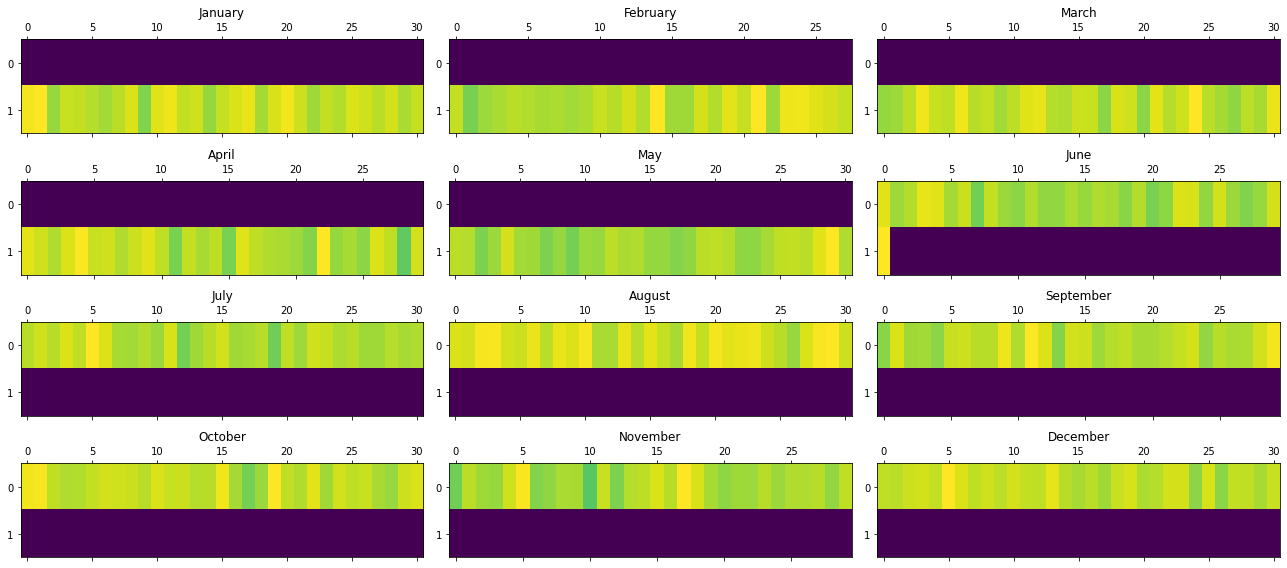

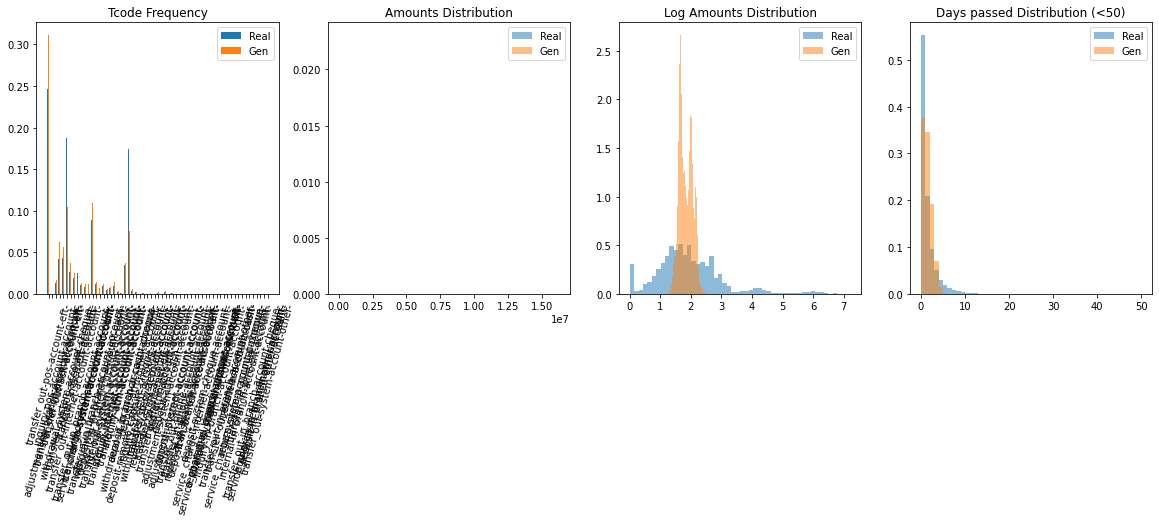

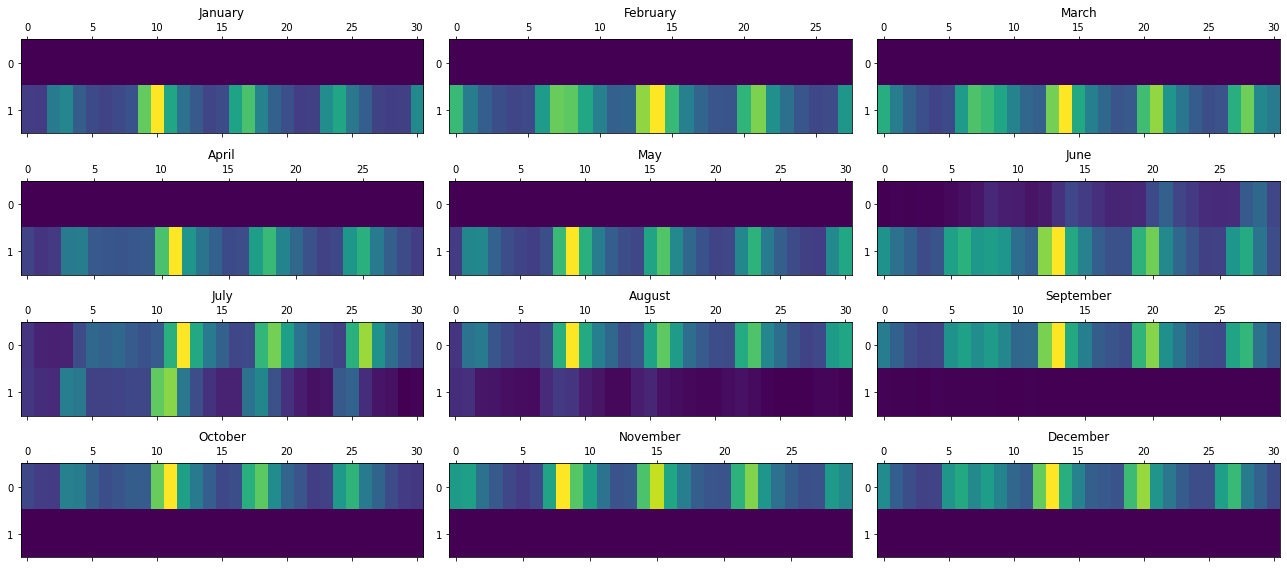

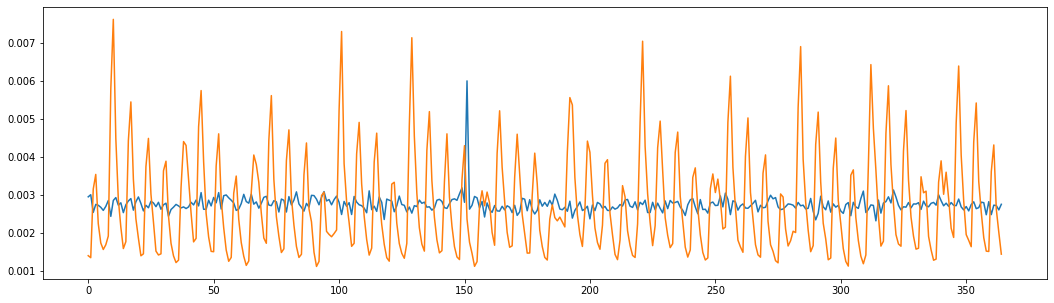

In [16]:
hm_real = plot_time_heatmap(real_df)
compare_distributions(tables= [real_df, gen_df], labels=["Real", "Gen"])
hm_gen = plot_time_heatmap(gen_df)
plt_tr_density_by_time([hm_real, hm_gen], ["Real", "Gen"])
plt.show()

# PCA

## Setup

required fields = ["tcode", "amount", "account_id", "days_passed", "age" ] 

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
tcode_nums_r = real_df["tcode"].apply(lambda x: data_encoder.TCODE_TO_NUM[x])
tcode_nums_g = gen_df["tcode_nums"]

In [18]:
oh_r = tf.one_hot(tcode_nums_r, depth=data_encoder.n_tcodes)
oh_g = tf.one_hot(tcode_nums_g, depth=data_encoder.n_tcodes)

In [19]:
data_r = np.concatenate([np.array(real_df["amount"])[:,None], oh_r.numpy()], axis=1)
data_r.shape

(304843, 62)

In [20]:
data_g = np.concatenate([np.array(gen_df["amount"])[:,None], oh_g.numpy()], axis=1)
data_g.shape

(324320, 62)

In [21]:
tcode_names = [data_encoder.NUM_TO_TCODE[i] for i in range(data_encoder.n_tcodes)]

In [22]:
real_trans_df = pd.DataFrame.from_records(data_r, columns=["amount"] + tcode_names)
real_trans_df["account_id"] = real_df["account_id"]
real_trans_df["age"] = real_df["age"]
real_trans_df["log_amount"] = np.log10(real_trans_df["amount"]+1)

AMOUNT_SCALE = real_trans_df["amount"].std()
LOG_AMOUNT_SCALE = real_trans_df["log_amount"].std()

real_trans_df["amount_sc"] = real_trans_df["amount"] / AMOUNT_SCALE
real_trans_df["log_amount_sc"] = real_trans_df["log_amount"] / LOG_AMOUNT_SCALE

real_trans_df["days_passed"] = real_df["days_passed"]

real_trans_df

,amount,transfer_out-pos-account-eft-,adjustment-in_branch-account-account-,inquiry-pos-account-account-,transfer_out-internet-account-eft-,transfer_out-ach-account-eft-,withdrawal-system-account-cheque-,transfer_out-pos-account-account-,transfer_out-internet-account-account-,transfer_in-ach-eft-account-,...,service_charge-in_branch-other-account-,inquiry-system-unknown-unknown-,deposit-in_branch-other-account-,transfer_out-system-account-other-,account_id,age,log_amount,amount_sc,log_amount_sc,days_passed
0,79.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1000,59,1.904174,0.000189,1.676731,0.0
1,31.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1000,59,1.505557,0.000074,1.325727,1.0
2,22.12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1000,59,1.363988,0.000053,1.201067,0.0
3,6.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1000,59,0.888741,0.000016,0.782586,0.0
4,11.68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1000,59,1.103119,0.000028,0.971358,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304838,13.89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1999,15,1.172895,0.000033,1.032799,0.0
304839,878.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1999,15,2.944043,0.002098,2.592394,1.0
304840,392.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1999,15,2.594393,0.000937,2.284507,1.0
304841,18.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1999,15,1.298635,0.000045,1.143520,0.0


In [25]:
gen_trans_df = pd.DataFrame.from_records(data_g, columns=["amount"] + tcode_names)
gen_trans_df["age"] = gen_df["age"]
gen_trans_df["account_id"] = gen_df["account_id"]
gen_trans_df["log_amount"] = np.log10(gen_trans_df["amount"]+1)

gen_trans_df["amount_sc"] = gen_trans_df["amount"] / AMOUNT_SCALE
gen_trans_df["log_amount_sc"] = gen_trans_df["log_amount"] / LOG_AMOUNT_SCALE

gen_trans_df["days_passed"] = gen_df["days_passed"]

gen_trans_df

,amount,transfer_out-pos-account-eft-,adjustment-in_branch-account-account-,inquiry-pos-account-account-,transfer_out-internet-account-eft-,transfer_out-ach-account-eft-,withdrawal-system-account-cheque-,transfer_out-pos-account-account-,transfer_out-internet-account-account-,transfer_in-ach-eft-account-,...,transfer_out-in_branch-account-cheque-,service_charge-in_branch-other-account-,inquiry-system-unknown-unknown-,deposit-in_branch-other-account-,transfer_out-system-account-other-,age,log_amount,amount_sc,log_amount_sc,days_passed
0,145.759995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,66,2.166608,0.000348,1.907819,2
1,115.199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,66,2.065206,0.000275,1.818529,0
2,90.959999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,66,1.963599,0.000217,1.729058,0
3,49.650002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,66,1.704579,0.000119,1.500977,2
4,58.180000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,66,1.772175,0.000139,1.560499,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324315,39.910000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35,1.611829,0.000095,1.419305,1
324316,111.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35,2.052694,0.000267,1.807511,0
324317,40.860001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35,1.621799,0.000098,1.428084,0
324318,35.700001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35,1.564666,0.000085,1.377775,2


## Transactions

### Unscaled - tcodes, amount, td

In [ ]:
n_pts = 10000 # dont plot all transactions
cols = tcode_names + ["amount", "days_passed"]

In [26]:
pca = PCA()

tr_real_pc = pca.fit_transform(real_trans_df[cols])
tr_gen_pc = pca.transform(gen_trans_df[cols])

inds = np.random.choice(data_r.shape[0], size=n_pts, replace=False)
inds

array([221366, 226324, 221990, ..., 277897,   5569,  30986])

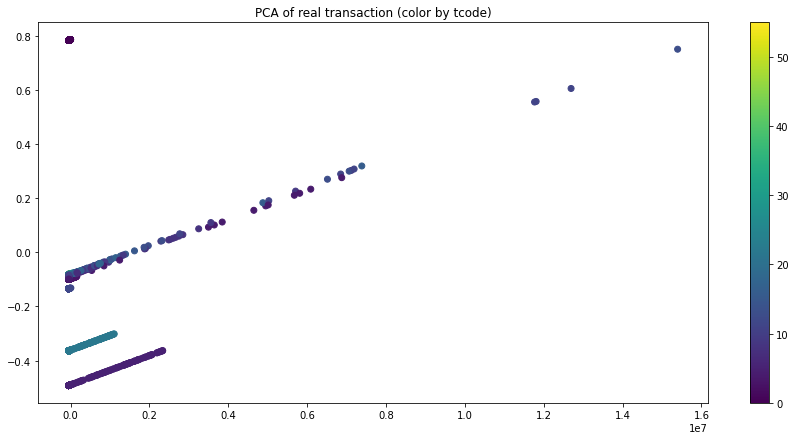

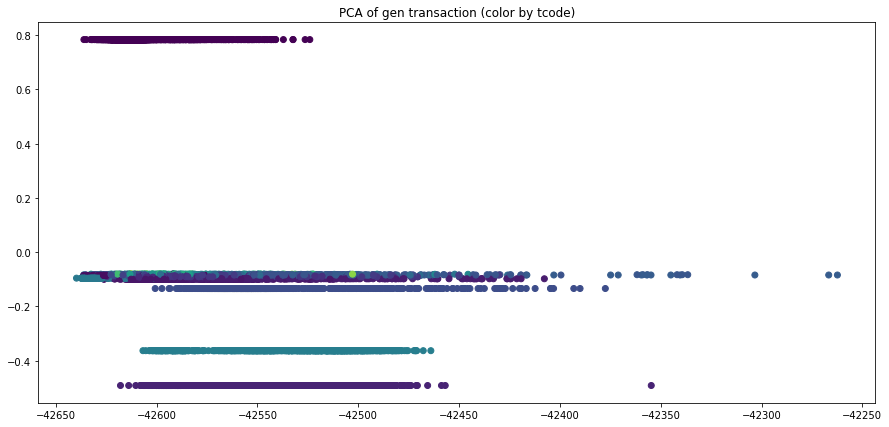

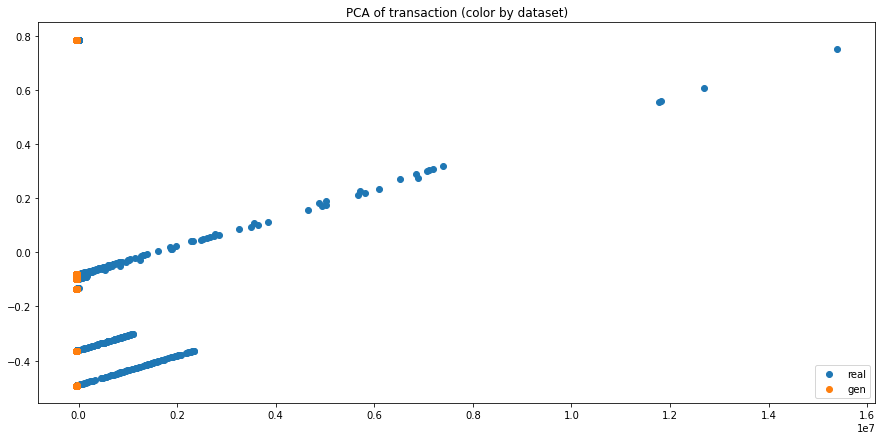

In [61]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], c=tcode_nums_r[inds])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], c=tcode_nums_g[inds])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], label="real")
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

### Unscaled - tcodes, amount (no td)

In [63]:
n_pts = 10000
cols = tcode_names + ["amount"]


pca = PCA()

tr_real_pc = pca.fit_transform(real_trans_df[cols])
tr_gen_pc = pca.transform(gen_trans_df[cols])


inds = np.random.choice(data_r.shape[0], size=n_pts, replace=False)
inds

array([101888, 206272,  91347, ..., 194957,  29345,   9456])

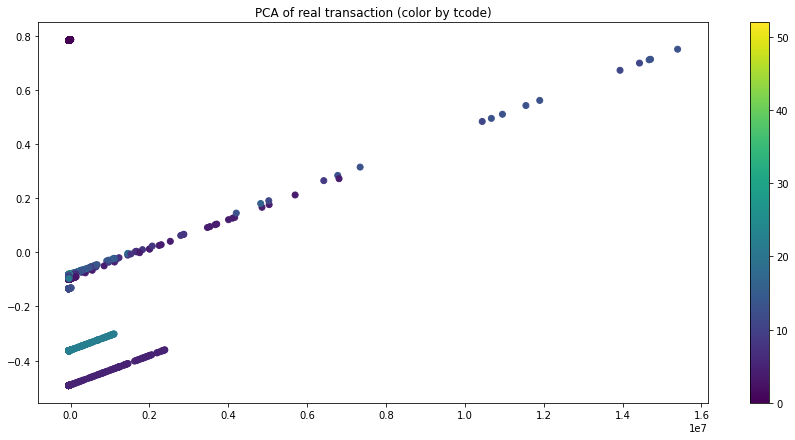

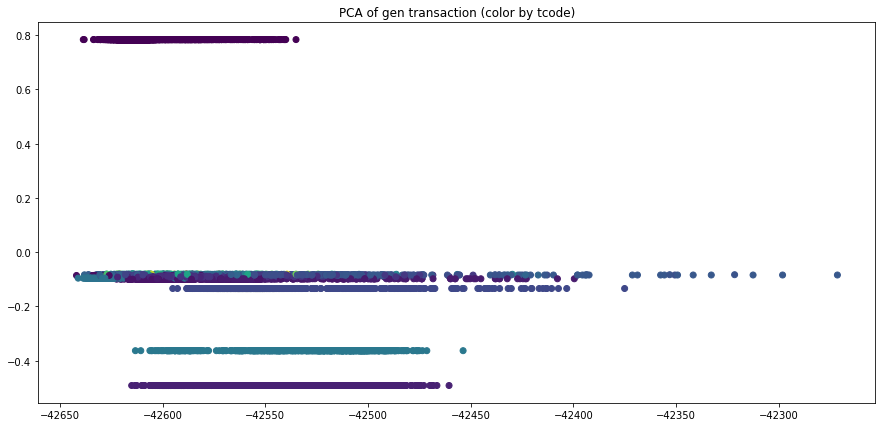

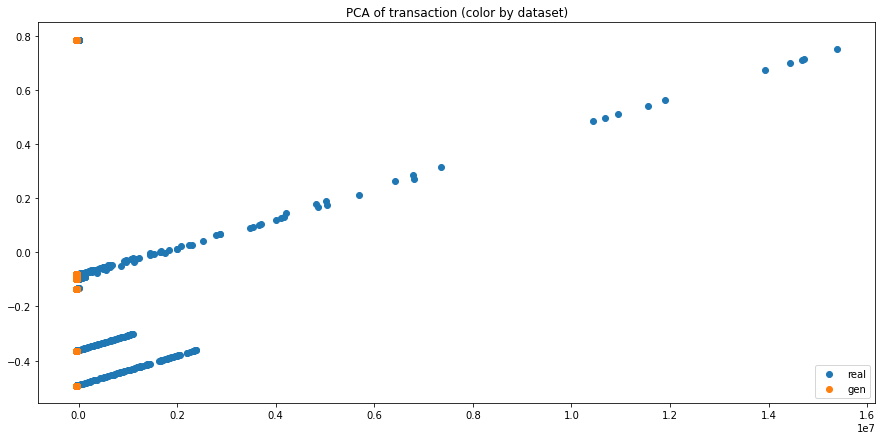

In [64]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], c=tcode_nums_r[inds])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], c=tcode_nums_g[inds])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], label="real")
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

### Scaled - tcodes, amount, td

In [66]:
n_pts = 10000
cols = tcode_names + ["amount", "days_passed"]


pca = PCA()

scaler = StandardScaler()

tr_real_pc = pca.fit_transform(
    scaler.fit_transform(real_trans_df[cols])
)

tr_gen_pc = pca.transform(
    scaler.transform(gen_trans_df[cols])
)


inds = np.random.choice(data_r.shape[0], size=n_pts, replace=False)
inds

array([141369,  10194,  11478, ..., 151034,  38051, 122684])

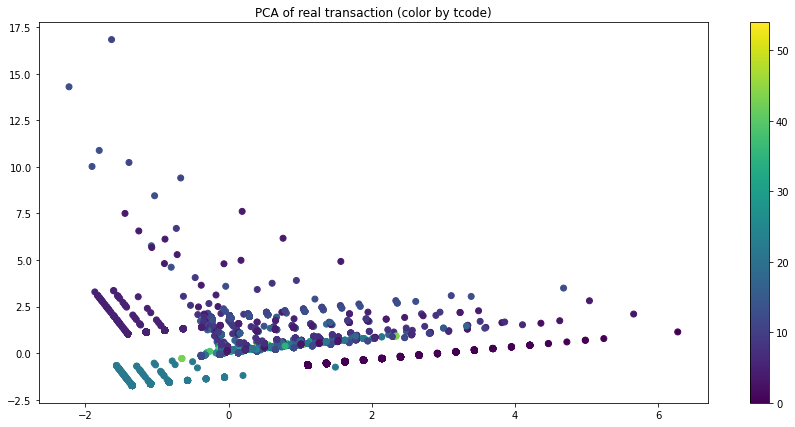

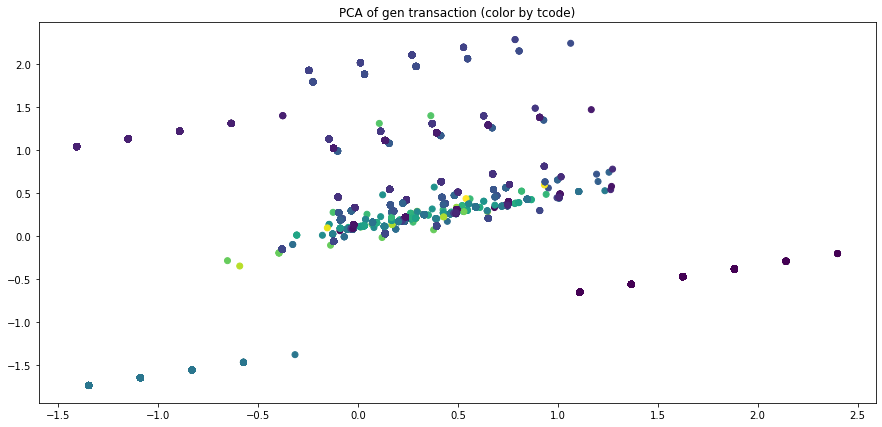

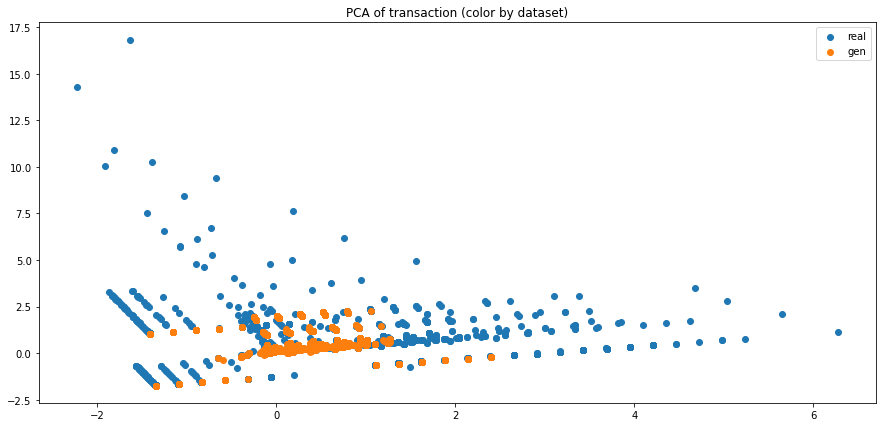

In [67]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], c=tcode_nums_r[inds])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], c=tcode_nums_g[inds])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], label="real")
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

### Scaled - tcodes, amount, (no td)

In [68]:
n_pts = 10000
cols = tcode_names + ["amount"]


pca = PCA()

scaler = StandardScaler()

tr_real_pc = pca.fit_transform(
    scaler.fit_transform(real_trans_df[cols])
)

tr_gen_pc = pca.transform(
    scaler.transform(gen_trans_df[cols])
)


inds = np.random.choice(data_r.shape[0], size=n_pts, replace=False)
inds

array([ 87988,  16052, 183167, ...,  74837, 162786,  71972])

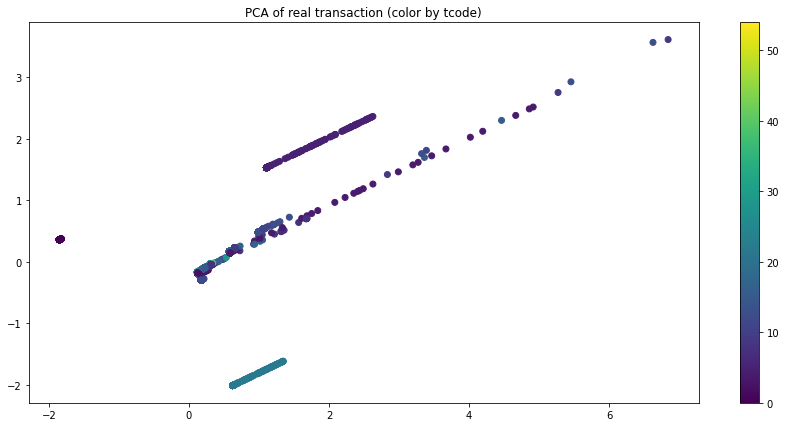

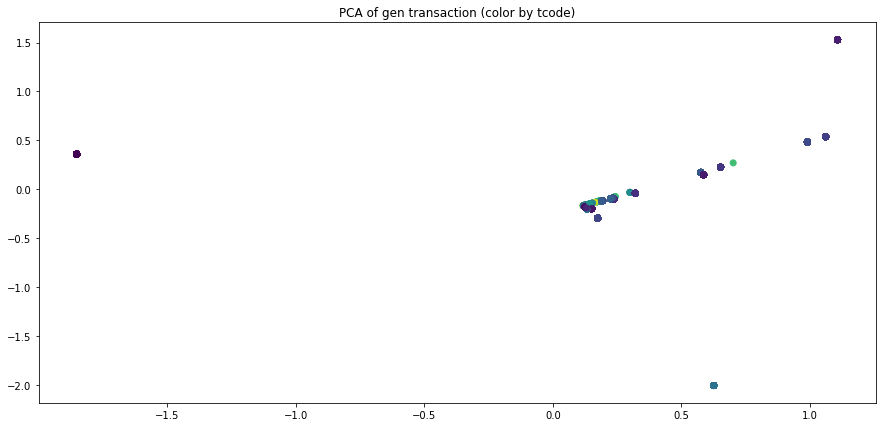

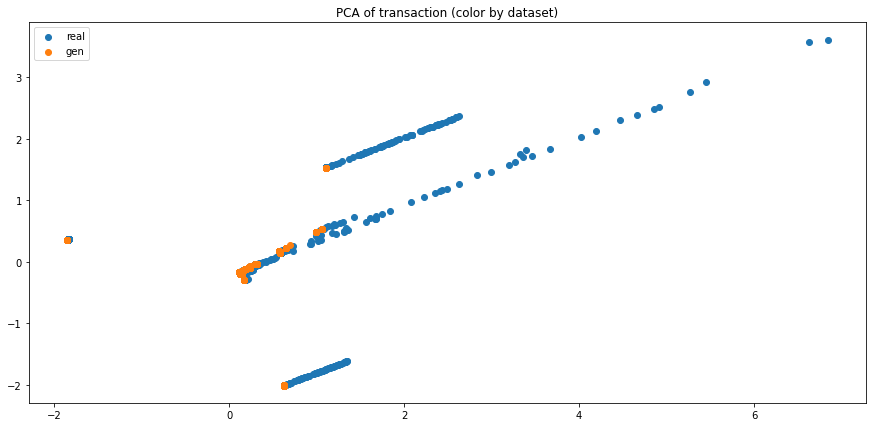

In [69]:
plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], c=tcode_nums_r[inds])
plt.title("PCA of real transaction (color by tcode)")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], c=tcode_nums_g[inds])
plt.title("PCA of gen transaction (color by tcode)")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(tr_real_pc[inds,0], tr_real_pc[inds, 1], label="real")
plt.scatter(tr_gen_pc[inds,0], tr_gen_pc[inds, 1], label="gen")
plt.title("PCA of transaction (color by dataset)")
plt.legend()
plt.show()

## Seqs

### Setup

In [70]:
real_seq_df = real_trans_df.groupby("account_id").mean()
real_seq_df

,amount,transfer_out-pos-account-eft-,adjustment-in_branch-account-account-,inquiry-pos-account-account-,transfer_out-internet-account-eft-,transfer_out-ach-account-eft-,withdrawal-system-account-cheque-,transfer_out-pos-account-account-,transfer_out-internet-account-account-,transfer_in-ach-eft-account-,...,transfer_out-in_branch-account-cheque-,service_charge-in_branch-other-account-,inquiry-system-unknown-unknown-,deposit-in_branch-other-account-,transfer_out-system-account-other-,age,log_amount,amount_sc,log_amount_sc,days_passed
account_id,,,,,,,,,,,,,,,,,,,,,
1000,107855.281534,0.426136,0.005682,0.034091,0.107955,0.090909,0.022727,0.034091,0.056818,0.051136,...,0.0,0.0,0.0,0.0,0.0,59,1.816872,0.257707,1.599856,2.051136
1001,34063.180297,0.234421,0.000000,0.011869,0.053412,0.053412,0.011869,0.029674,0.011869,0.035608,...,0.0,0.0,0.0,0.0,0.0,70,1.956184,0.081390,1.722529,1.083086
1002,138574.505556,0.476852,0.000000,0.013889,0.060185,0.083333,0.027778,0.046296,0.013889,0.041667,...,0.0,0.0,0.0,0.0,0.0,38,1.853927,0.331106,1.632486,1.662037
1003,136395.987069,0.396552,0.000000,0.021552,0.068966,0.112069,0.012931,0.034483,0.043103,0.051724,...,0.0,0.0,0.0,0.0,0.0,68,1.887804,0.325901,1.662316,1.573276
1004,102926.877771,0.388571,0.000000,0.040000,0.074286,0.057143,0.034286,0.051429,0.045714,0.051429,...,0.0,0.0,0.0,0.0,0.0,85,1.678867,0.245931,1.478335,1.994286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,44329.343192,0.101987,0.001325,0.006623,0.017219,0.015894,0.382781,0.013245,0.000000,0.003974,...,0.0,0.0,0.0,0.0,0.0,70,2.253028,0.105919,1.983916,0.483444
1996,1789.270691,0.252252,0.000000,0.000000,0.024024,0.042042,0.003003,0.033033,0.021021,0.033033,...,0.0,0.0,0.0,0.0,0.0,85,1.751028,0.004275,1.541877,1.087087
1997,971.342378,0.234756,0.000000,0.003049,0.033537,0.021341,0.024390,0.015244,0.012195,0.030488,...,0.0,0.0,0.0,0.0,0.0,20,1.701077,0.002321,1.497893,1.109756


In [71]:
gen_seq_df = gen_trans_df.groupby("account_id").mean()
gen_seq_df

,amount,transfer_out-pos-account-eft-,adjustment-in_branch-account-account-,inquiry-pos-account-account-,transfer_out-internet-account-eft-,transfer_out-ach-account-eft-,withdrawal-system-account-cheque-,transfer_out-pos-account-account-,transfer_out-internet-account-account-,transfer_in-ach-eft-account-,...,transfer_out-in_branch-account-cheque-,service_charge-in_branch-other-account-,inquiry-system-unknown-unknown-,deposit-in_branch-other-account-,transfer_out-system-account-other-,age,log_amount,amount_sc,log_amount_sc,days_passed
account_id,,,,,,,,,,,,,,,,,,,,,
0,68.385125,0.2875,0.0,0.0000,0.0875,0.1000,0.0500,0.0625,0.0375,0.0500,...,0.0,0.0,0.0,0.0,0.0,66.0,1.804193,0.000163,1.588692,1.1500
1,63.489750,0.3125,0.0,0.0000,0.0625,0.0750,0.0500,0.0750,0.0375,0.0125,...,0.0,0.0,0.0,0.0,0.0,38.0,1.771361,0.000152,1.559782,1.0875
2,59.616125,0.4875,0.0,0.0250,0.1000,0.0375,0.0375,0.0125,0.0500,0.0250,...,0.0,0.0,0.0,0.0,0.0,40.0,1.749229,0.000142,1.540293,1.0625
3,61.452375,0.4500,0.0,0.0000,0.0750,0.0875,0.0375,0.0250,0.0000,0.0125,...,0.0,0.0,0.0,0.0,0.0,61.0,1.752883,0.000147,1.543511,1.0875
4,131.324375,0.1125,0.0,0.0000,0.0375,0.0250,0.3375,0.0125,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,53.0,2.105309,0.000314,1.853842,0.4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,61.169875,0.4375,0.0,0.0000,0.1125,0.0500,0.0375,0.0125,0.0500,0.0125,...,0.0,0.0,0.0,0.0,0.0,67.0,1.759833,0.000146,1.549631,1.1750
4050,129.082750,0.1000,0.0,0.0125,0.0000,0.0000,0.4750,0.0000,0.0125,0.0250,...,0.0,0.0,0.0,0.0,0.0,74.0,2.100886,0.000308,1.849947,0.6250
4051,59.794750,0.3125,0.0,0.0375,0.0875,0.0250,0.0250,0.0625,0.0500,0.0250,...,0.0,0.0,0.0,0.0,0.0,60.0,1.751830,0.000143,1.542584,1.2750


### Unscaled Seqs

In [73]:
cols = tcode_names + ["amount"]

pca = PCA()

seqs_r_pc = pca.fit_transform(real_seq_df[cols])
seqs_g_pc = pca.transform(gen_seq_df[cols])

seqs_r_pc.shape, seqs_g_pc.shape

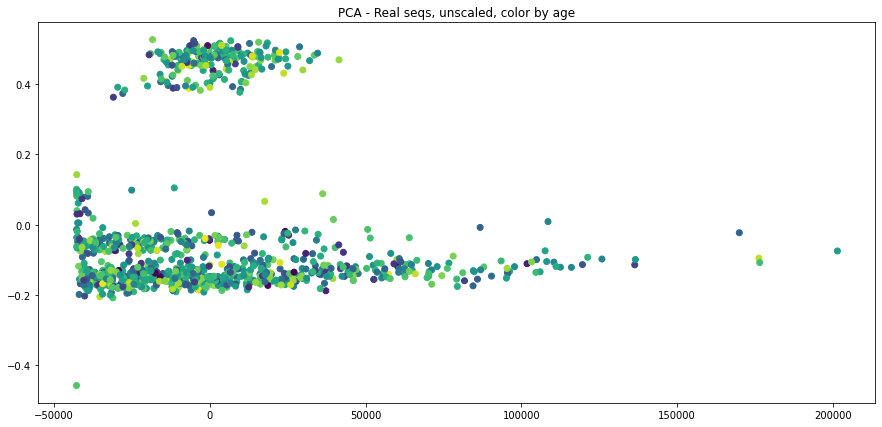

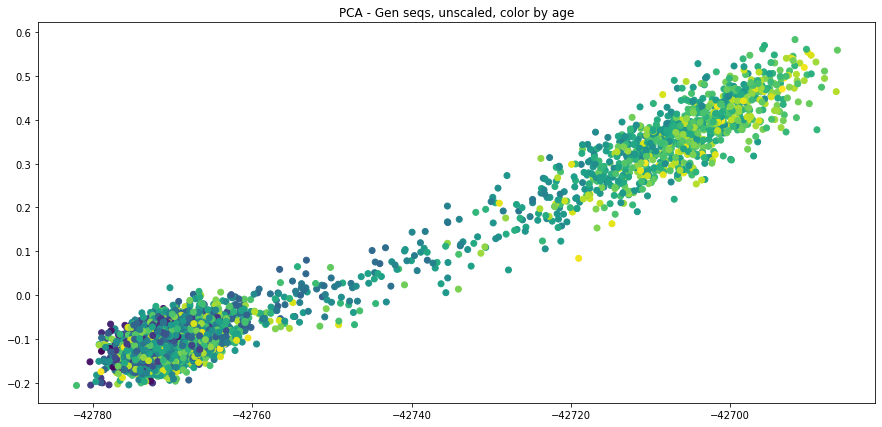

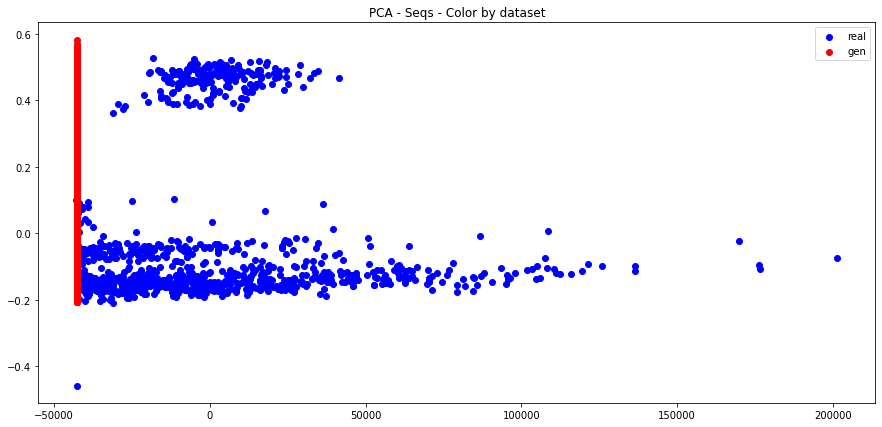

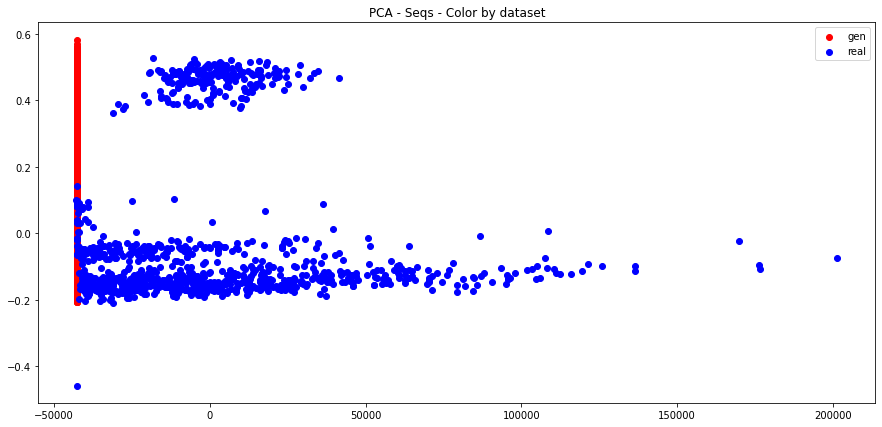

<AxesSubplot:>

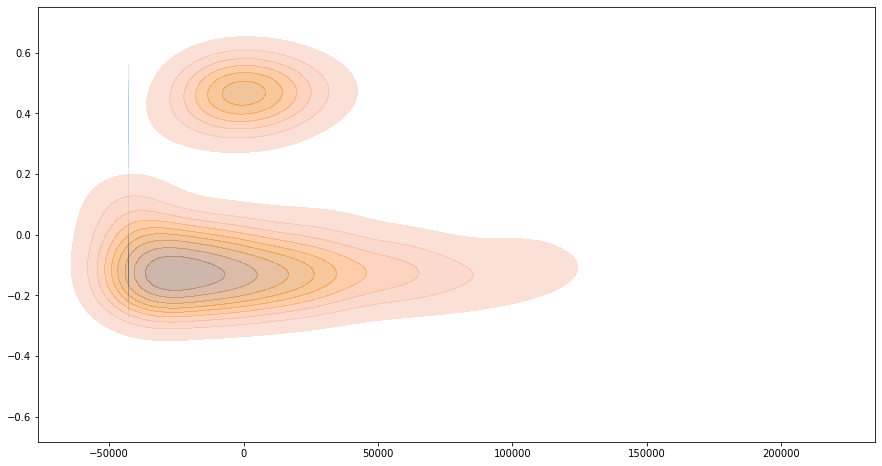

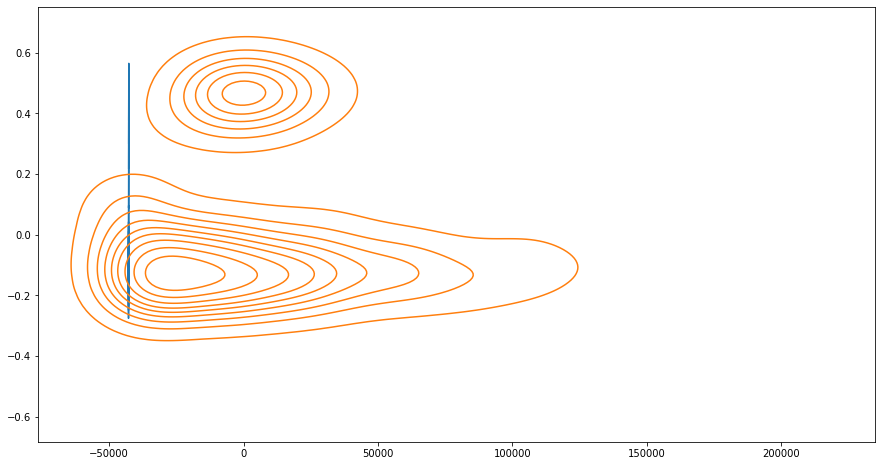

In [97]:
plt.figure(figsize=(15,7))
plt.scatter(seqs_r_pc[:,0], seqs_r_pc[:, 1], c=real_seq_df["age"])
plt.title("PCA - Real seqs, unscaled, color by age")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(seqs_g_pc[:,0], seqs_g_pc[:, 1], c=gen_seq_df["age"])
plt.title("PCA - Gen seqs, unscaled, color by age")
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Color by dataset")
plt.scatter(seqs_r_pc[:,0], seqs_r_pc[:, 1], label="real", c="b")
plt.scatter(seqs_g_pc[:,0], seqs_g_pc[:, 1], label="gen", c="r")
plt.legend()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Color by dataset")
plt.scatter(seqs_g_pc[:,0], seqs_g_pc[:, 1], label="gen", c="r")
plt.scatter(seqs_r_pc[:,0], seqs_r_pc[:, 1], label="real", c="b")
plt.legend()
plt.show()



plt.figure(figsize=(15, 8))
sns.kdeplot(x=seqs_g_pc[:,0], y=seqs_g_pc[:,1], label= "gen", shade=True, alpha=0.4)
sns.kdeplot(x=seqs_r_pc[:,0], y=seqs_r_pc[:,1], label= "real", shade=True, alpha=0.4)

plt.figure(figsize=(15, 8))
sns.kdeplot(x=seqs_g_pc[:,0], y=seqs_g_pc[:,1], label= "gen")
sns.kdeplot(x=seqs_r_pc[:,0], y=seqs_r_pc[:,1], label= "real")

### Scaled Seqs (0 mean, 1 sd) (no td)

In [98]:
cols = tcode_names + ["amount"]

scaler = StandardScaler()
scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(gen_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)
scaled_seqs_g_pc = pca.transform(scaled_seqs_g)

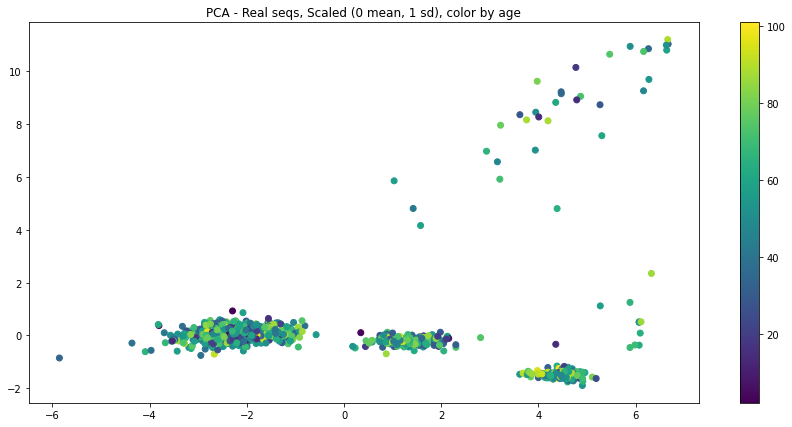

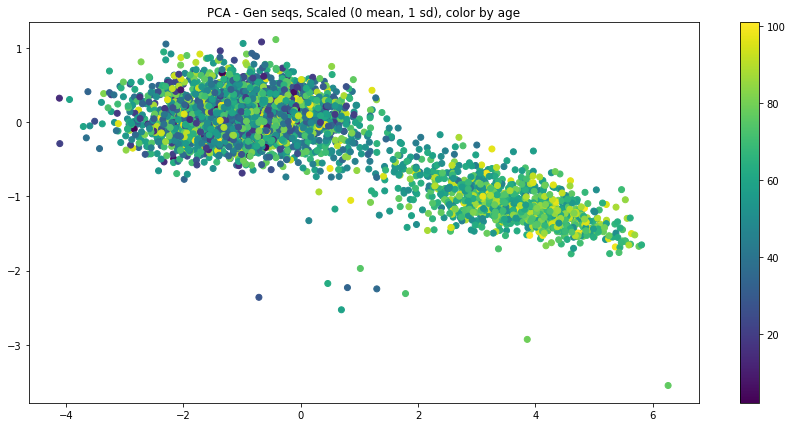

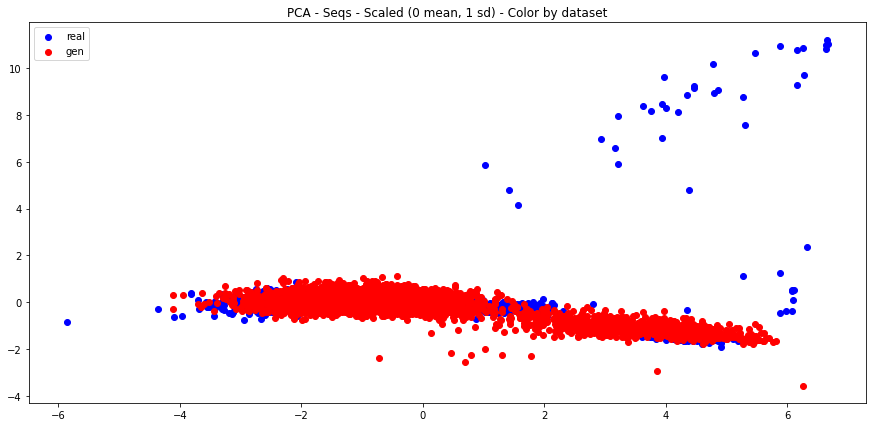

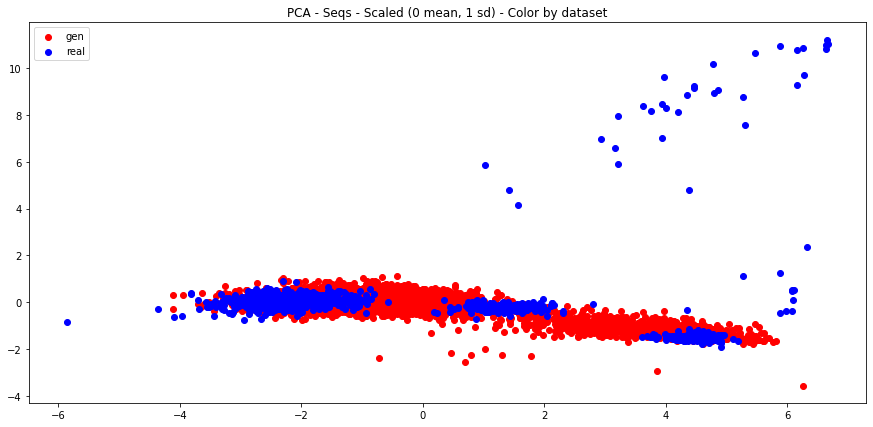

In [99]:
plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], c=real_seq_df["age"])
plt.title("PCA - Real seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], c=gen_seq_df["age"])
plt.title("PCA - Gen seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.legend()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.legend()
plt.show()

In [100]:
df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "real"

pcs_scaled = pd.concat([df1, df2]).reset_index()

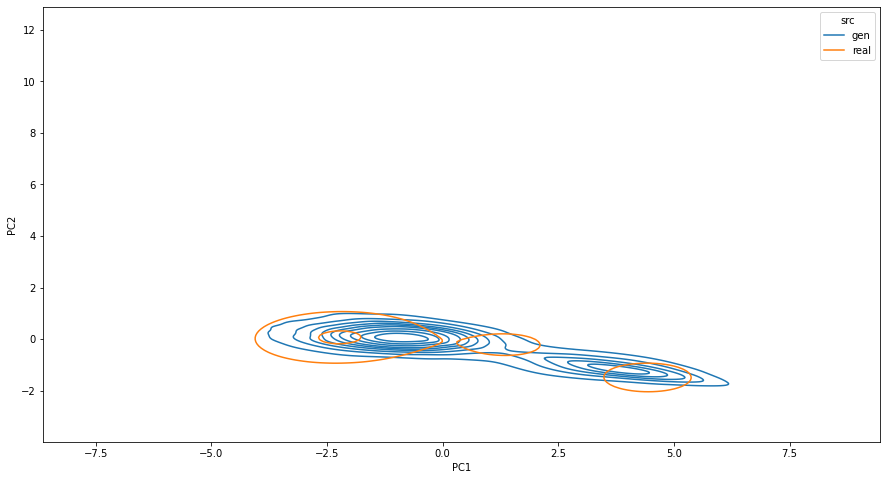

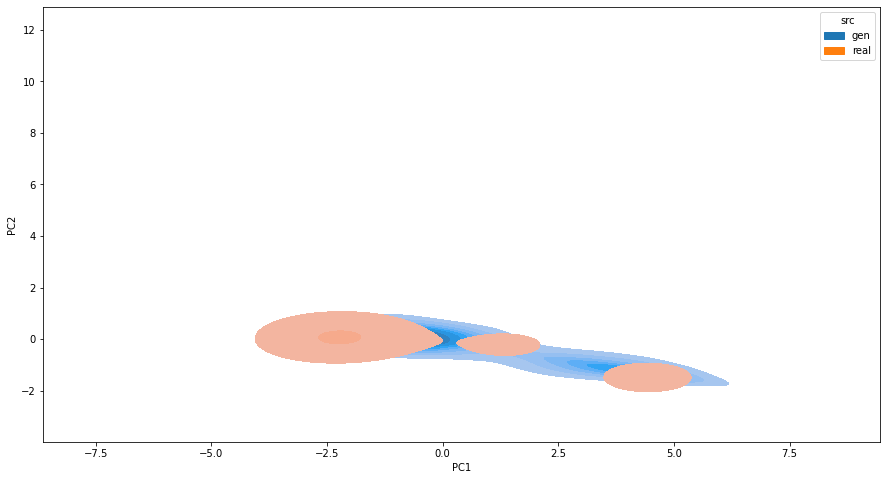

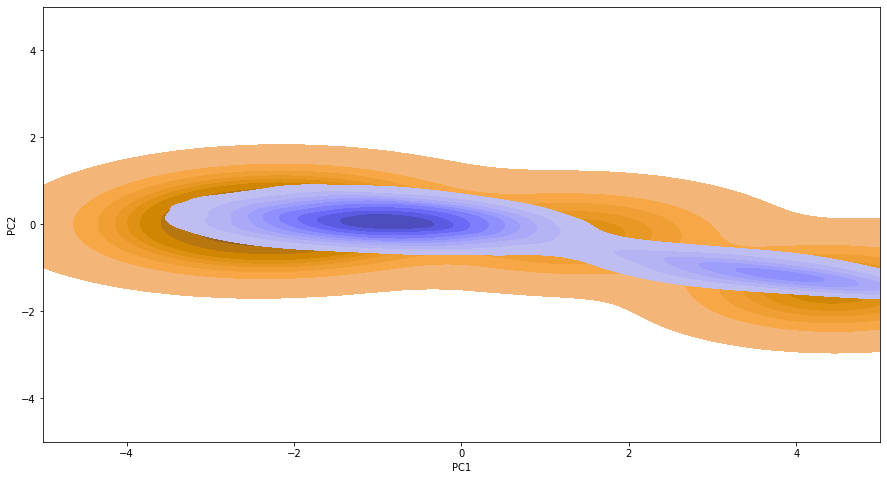

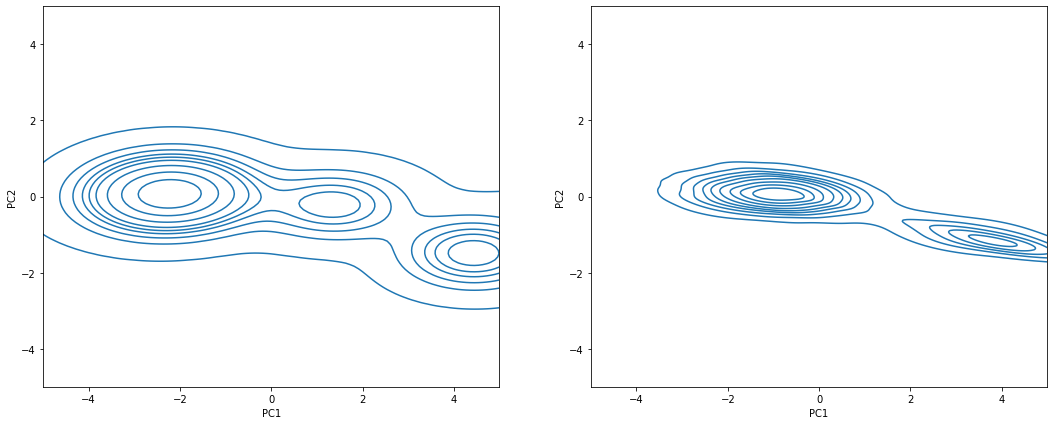

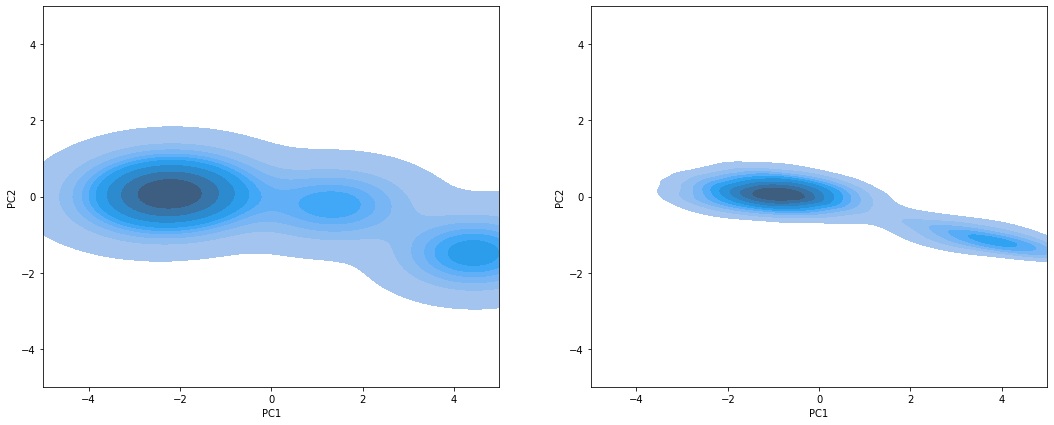

In [101]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src")

plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src", fill=True)

plt.figure(figsize=(15, 8))
plt.ylim([-5,5])
plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2", fill=True, color="orange")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2", fill=True, color="b")


fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1])

plt.show()

fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0], fill=True)
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1], fill=True)

plt.show()

### Scaled Seqs (0 mean, 1 sd) (with td)

In [102]:
cols = tcode_names + ["amount", "days_passed"]

scaler = StandardScaler()
scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(gen_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)
scaled_seqs_g_pc = pca.transform(scaled_seqs_g)

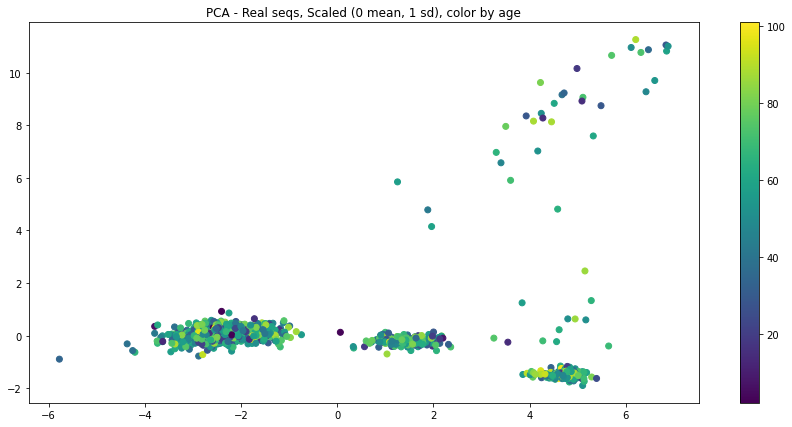

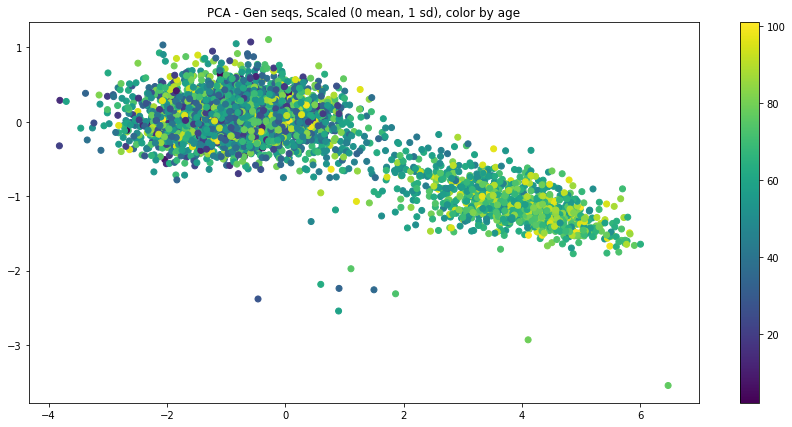

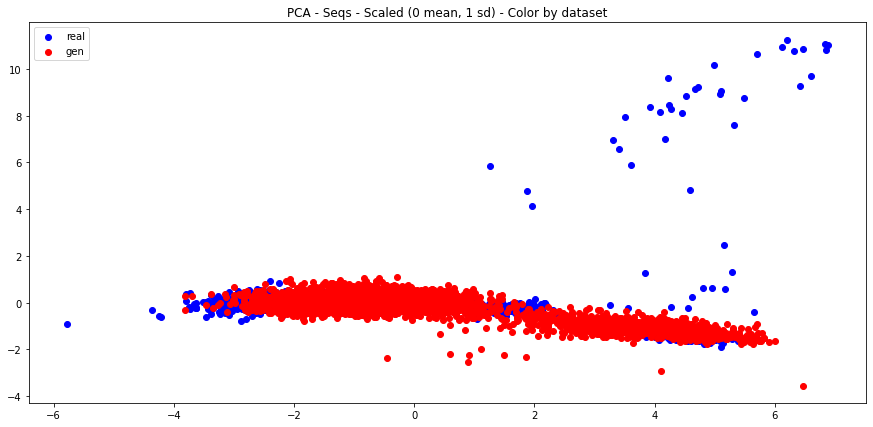

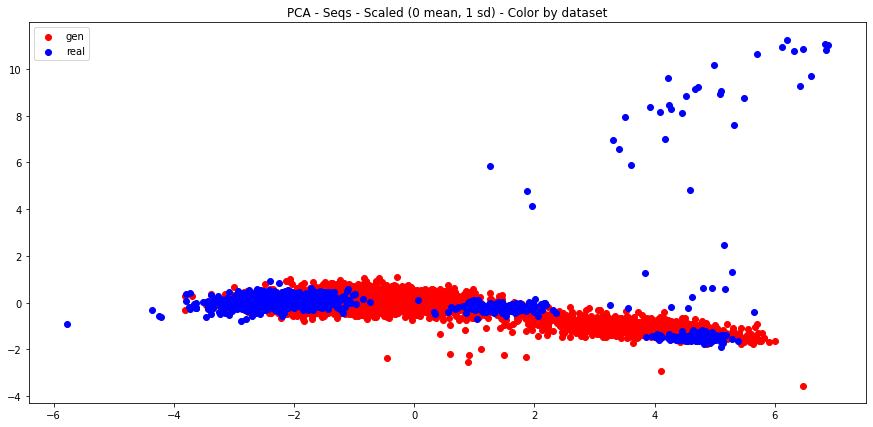

In [103]:
plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], c=real_seq_df["age"])
plt.title("PCA - Real seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], c=gen_seq_df["age"])
plt.title("PCA - Gen seqs, Scaled (0 mean, 1 sd), color by age")
plt.colorbar()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.legend()
plt.show()


plt.figure(figsize=(15,7))
plt.title("PCA - Seqs - Scaled (0 mean, 1 sd) - Color by dataset")
plt.scatter(scaled_seqs_g_pc[:,0], scaled_seqs_g_pc[:, 1], label="gen", c="r")
plt.scatter(scaled_seqs_r_pc[:,0], scaled_seqs_r_pc[:, 1], label="real", c="b")
plt.legend()
plt.show()

In [104]:
df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "real"

pcs_scaled = pd.concat([df1, df2]).reset_index()

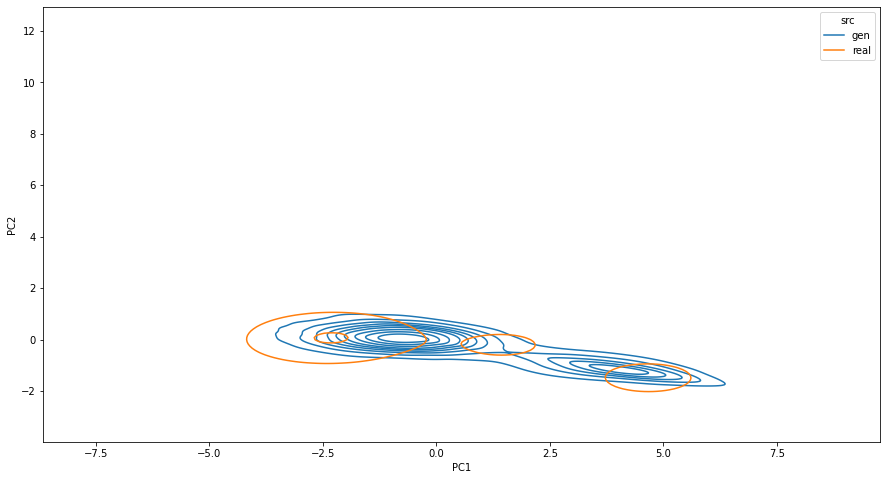

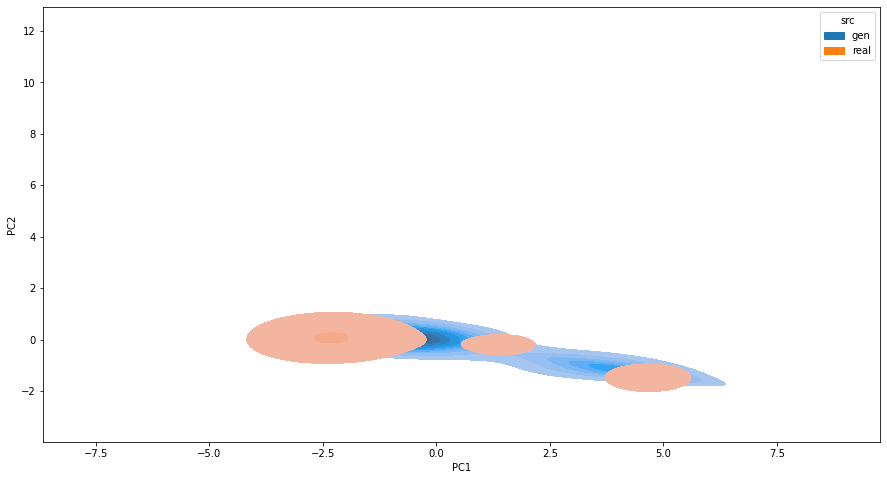

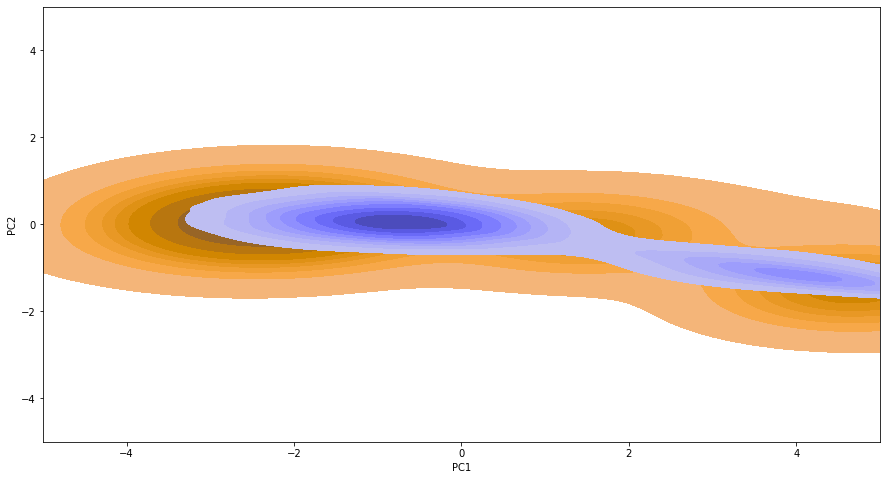

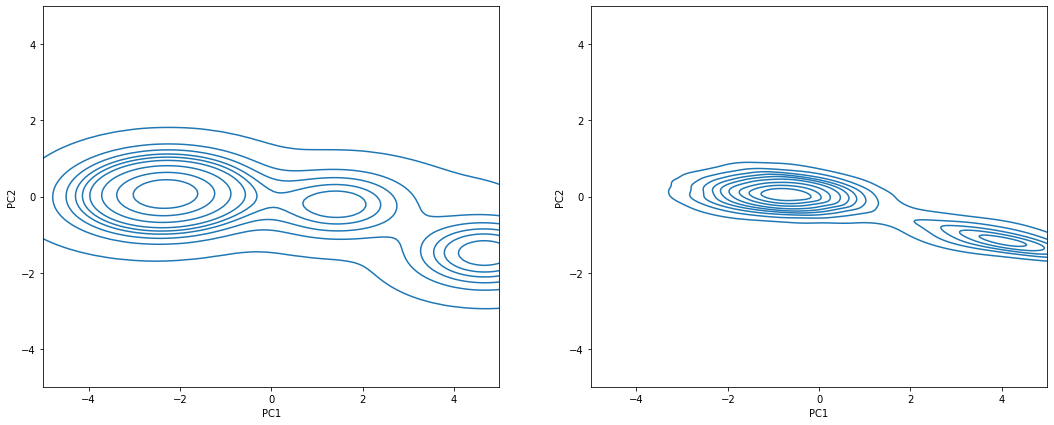

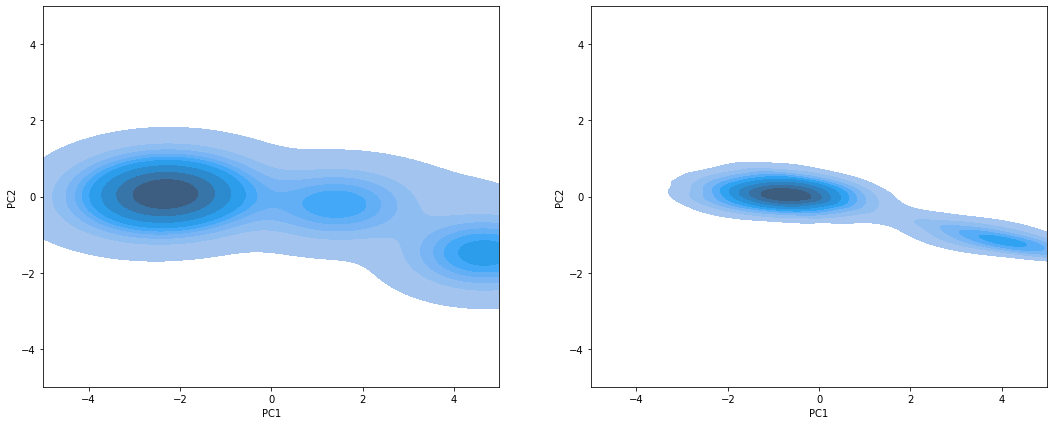

In [105]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src")

plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src", fill=True)

plt.figure(figsize=(15, 8))
plt.ylim([-5,5])
plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2", fill=True, color="orange")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2", fill=True, color="b")


fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1])

plt.show()

fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0], fill=True)
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1], fill=True)

plt.show()

## Estimate KL between PC distributions

In [106]:
from sklearn.neighbors import KernelDensity

In [107]:
P = KernelDensity().fit(pcs_scaled[pcs_scaled["src"]=="real"][["PC1", "PC2"]])
Q = KernelDensity().fit(pcs_scaled[pcs_scaled["src"]=="gen"][["PC1", "PC2"]])

In [110]:
# P - real
# Q - gen

class MixedKDE:
    def __init__(self, P, Q):
        self.P = P
        self.Q = Q
        
        
    def sample(self, n):
        n1 = int(n // 2)
        n2 = n - n1
        samples_p = self.P.sample(n1)
        samples_q = self.Q.sample(n2)
        
        return np.concatenate([samples_p, samples_q])
    
    
    def score_samples(self, samples):
        return (self.P.score_samples(samples) +
               self.Q.score_samples(samples)) / 2
    

# estimates KL(P||Q) with monte carlo sampling
# (How well Q does as an approximation of P )
def estimate_jsd_kde(P, Q, n=10_000):
    
    M = MixedKDE(P,Q)
    samples_r = P.sample(n)
    samples_g = Q.sample(n)
    
    KL_PM = estimate_kl_from_kde(P, M, n=n)
    KL_QM = estimate_kl_from_kde(Q, M, n=n)
    
    return np.mean(KL_PM + KL_PM)/2
    
    
    


# estimates KL(P||Q) with monte carlo sampling
# (How well Q does as an approximation of P )
def estimate_kl_from_kde(P, Q, n=10_000):
    samples_r = P.sample(n)
    logP_real = P.score_samples(samples_r)
    logQ_real = Q.score_samples(samples_r)
    
    return np.mean(logP_real - logQ_real)
    
    
    


In [111]:
estimates = [estimate_jsd_kde(P, Q, n=50_000) for _ in range(10)]

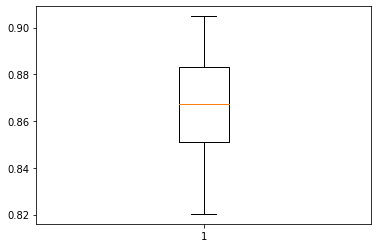

In [112]:
plt.boxplot(estimates)
plt.show()

In [113]:
estimates = [estimate_jsd_kde(P, Q, n=100_000) for _ in range(10)]

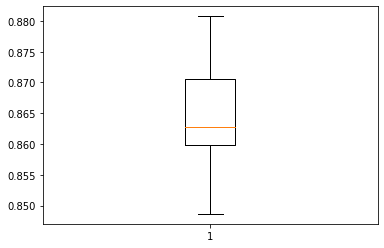

In [114]:
plt.boxplot(estimates)
plt.show()

Note: The fact that KL(P||Q) < KL(Q||P) means Q is better at approximating P than P is at approximating Q. 

This makes sense, and is in line with other results. The learned model is a smoothed version of the real data. Nearly everywhere the real data has significan density, the generative model also has significant density. 

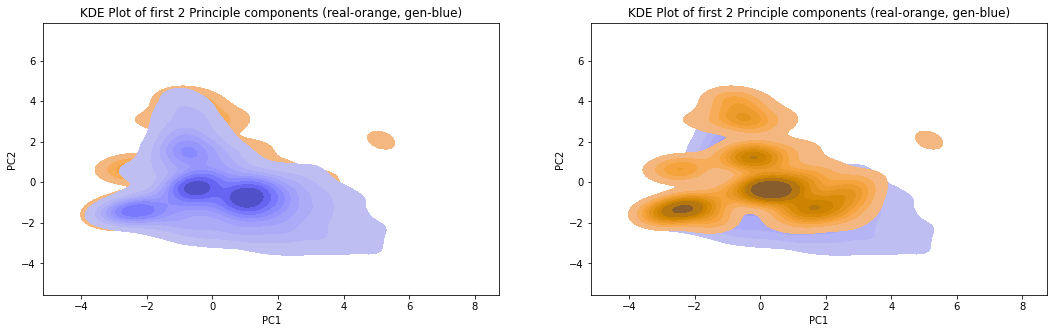  
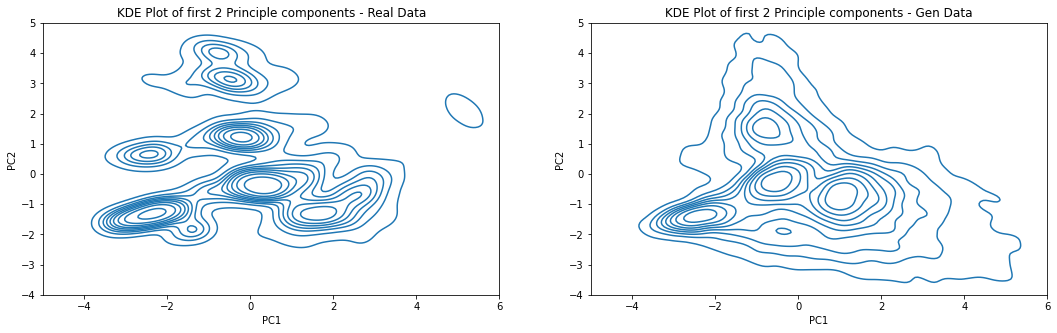  
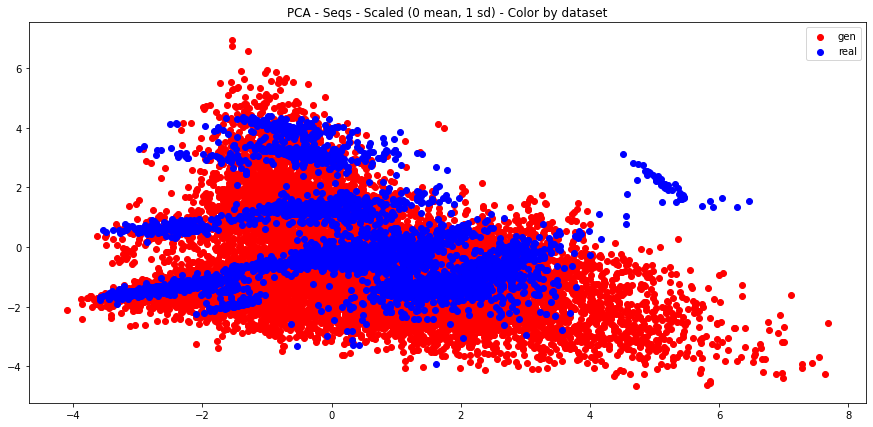

# N-grams

In [121]:
import nltk
from nltk.util import ngrams

In [122]:
def create_ngramcount_df(df, n):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    df["freqs"] = df["counts"] / sum(df["counts"])

    df.reset_index(inplace=True)
            
    return df

In [123]:
from scipy.spatial import distance

def jensenshannon_diverg(p,q):
    return distance.jensenshannon(p,q, base=2) ** 2

In [139]:
n = 4
real_ngrams = create_ngramcount_df(real_df, n)
gen_ngrams = create_ngramcount_df(gen_df, n)

In [140]:
real_ngrams

,index,counts,freqs
0,"'transfer_out-pos-account-eft-', 'transfer_out...",4894,0.016211
1,"'withdrawal-system-account-cheque-', 'withdraw...",3874,0.012832
2,"'withdrawal-system-account-cheque-', 'withdraw...",3865,0.012803
3,"'withdrawal-in_branch-account-cheque-', 'withd...",3851,0.012756
4,"'withdrawal-system-account-cheque-', 'withdraw...",3850,0.012753
...,...,...,...
46668,"'deposit-in_branch-cheque-account-', 'transfer...",1,0.000003
46669,"'transfer_out-pos-account-eft-', 'deposit-in_b...",1,0.000003
46670,"'transfer_in-ach-eft-account-', 'transfer_out-...",1,0.000003
46671,"'transfer_out-internet-account-eft-', 'transfe...",1,0.000003


In [141]:
gen_ngrams

,index,counts,freqs
0,"'transfer_out-pos-account-eft-', 'transfer_out...",4240,0.013583
1,"'withdrawal-system-account-cheque-', 'withdraw...",1672,0.005356
2,"'transfer_out-pos-account-eft-', 'transfer_out...",1526,0.004889
3,"'transfer_out-pos-account-eft-', 'transfer_out...",1526,0.004889
4,"'withdrawal-atm-account-cash-', 'transfer_out-...",1518,0.004863
...,...,...,...
65063,"'withdrawal-atm-account-cash-', 'inquiry-atm-a...",1,0.000003
65064,"'inquiry-atm-account-account-', 'adjustment-in...",1,0.000003
65065,"'adjustment-internet-account-account-', 'trans...",1,0.000003
65066,"'transfer_out-ach-account-eft-', 'inquiry-pos-...",1,0.000003


In [142]:
combo_df = pd.merge(real_ngrams, gen_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
    "counts_x":"counts_real", "freqs_x":"freqs_real", "counts_y":"counts_gen", "freqs_y":"freqs_gen", "index":"ngram"
})
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen
0,"'transfer_out-pos-account-eft-', 'transfer_out...",4894.0,0.016211,4240.0,0.013583
1,"'withdrawal-system-account-cheque-', 'withdraw...",3874.0,0.012832,1501.0,0.004808
2,"'withdrawal-system-account-cheque-', 'withdraw...",3865.0,0.012803,1195.0,0.003828
3,"'withdrawal-in_branch-account-cheque-', 'withd...",3851.0,0.012756,1229.0,0.003937
4,"'withdrawal-system-account-cheque-', 'withdraw...",3850.0,0.012753,1453.0,0.004655
...,...,...,...,...,...
86322,"'transfer_out-pos-account-eft-', 'withdrawal-a...",0.0,0.000000,1.0,0.000003
86323,"'withdrawal-atm-account-cash-', 'inquiry-atm-a...",0.0,0.000000,1.0,0.000003
86324,"'inquiry-atm-account-account-', 'adjustment-in...",0.0,0.000000,1.0,0.000003
86325,"'adjustment-internet-account-account-', 'trans...",0.0,0.000000,1.0,0.000003


In [143]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"])

0.2560135546845237

In [138]:
for n in range(1, 11):
    
    real_ngrams = create_ngramcount_df(real_df, n)
    gen_ngrams = create_ngramcount_df(gen_df, n)

    real_ngrams

    gen_ngrams

    combo_df = pd.merge(real_ngrams, gen_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
        "counts_x":"counts_real", "freqs_x":"freqs_real", "counts_y":"counts_gen", "freqs_y":"freqs_gen", "index":"ngram"
    })
    combo_df

    print(n, jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"]))

1 0.032219418051849046
2 0.06926811792738524
3 0.128290469061918
4 0.2560135546845237
5 0.4538965989300536
6 0.6506303952142136
7 0.7926050804882888
8 0.878521679858744
9 0.9275196972028552
10 0.9561974421608281


In [395]:
real_df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]

In [208]:
gb = real_df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]
gb

In [209]:
ngram_list = gb.apply(lambda x: list(ngrams(x, n=4)))
ngram_list

account_id
1000    [(transfer_out-pos-account-eft-, transfer_out-...
1001    [(withdrawal-atm-account-cash-, transfer_in-ac...
1002    [(transfer_out-ach-account-eft-, transfer_in-i...
1003    [(transfer_out-pos-account-eft-, withdrawal-at...
1004    [(transfer_in-in_branch-account-account-, tran...
                              ...                        
1995    [(withdrawal-system-account-cheque-, withdrawa...
1996    [(inquiry-atm-account-account-, withdrawal-atm...
1997    [(withdrawal-atm-account-cash-, transfer_out-p...
1998    [(transfer_out-pos-account-eft-, transfer_out-...
1999    [(deposit-in_branch-cheque-account-, transfer_...
Name: tcode, Length: 985, dtype: object

In [210]:
counts = {}
for ngram_seq in ngram_list:
    for ngram in ngram_seq:
        ngram = str(ngram)[1:-1]
        counts[ngram] = counts.get(ngram, 0) + 1

In [211]:
ngram

"'deposit-in_branch-cheque-account-', 'deposit-system-cheque-account-', 'deposit-remote_capture-cheque-account-', 'inquiry-pos-account-account-'"

In [212]:
sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]

[("'transfer_out-pos-account-eft-', 'transfer_out-pos-account-eft-', 'transfer_out-pos-account-eft-', 'transfer_out-pos-account-eft-'",
  4894),
 ("'withdrawal-system-account-cheque-', 'withdrawal-in_branch-account-cheque-', 'withdrawal-system-account-cheque-', 'withdrawal-system-account-cheque-'",
  3874),
 ("'withdrawal-system-account-cheque-', 'withdrawal-in_branch-account-cheque-', 'withdrawal-system-account-cheque-', 'withdrawal-in_branch-account-cheque-'",
  3865),
 ("'withdrawal-in_branch-account-cheque-', 'withdrawal-system-account-cheque-', 'withdrawal-in_branch-account-cheque-', 'withdrawal-system-account-cheque-'",
  3851),
 ("'withdrawal-system-account-cheque-', 'withdrawal-system-account-cheque-', 'withdrawal-in_branch-account-cheque-', 'withdrawal-system-account-cheque-'",
  3850),
 ("'withdrawal-in_branch-account-cheque-', 'withdrawal-system-account-cheque-', 'withdrawal-system-account-cheque-', 'withdrawal-in_branch-account-cheque-'",
  3832),
 ("'withdrawal-system-acco

In [214]:
df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
df["freqs"] = df["counts"] / sum(df["counts"])

df.reset_index(inplace=True)

In [146]:
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen
0,"'transfer_out-pos-account-eft-', 'transfer_out...",4894.0,0.016211,4240.0,0.013583
1,"'withdrawal-system-account-cheque-', 'withdraw...",3874.0,0.012832,1501.0,0.004808
2,"'withdrawal-system-account-cheque-', 'withdraw...",3865.0,0.012803,1195.0,0.003828
3,"'withdrawal-in_branch-account-cheque-', 'withd...",3851.0,0.012756,1229.0,0.003937
4,"'withdrawal-system-account-cheque-', 'withdraw...",3850.0,0.012753,1453.0,0.004655
...,...,...,...,...,...
86322,"'transfer_out-pos-account-eft-', 'withdrawal-a...",0.0,0.000000,1.0,0.000003
86323,"'withdrawal-atm-account-cash-', 'inquiry-atm-a...",0.0,0.000000,1.0,0.000003
86324,"'inquiry-atm-account-account-', 'adjustment-in...",0.0,0.000000,1.0,0.000003
86325,"'adjustment-internet-account-account-', 'trans...",0.0,0.000000,1.0,0.000003


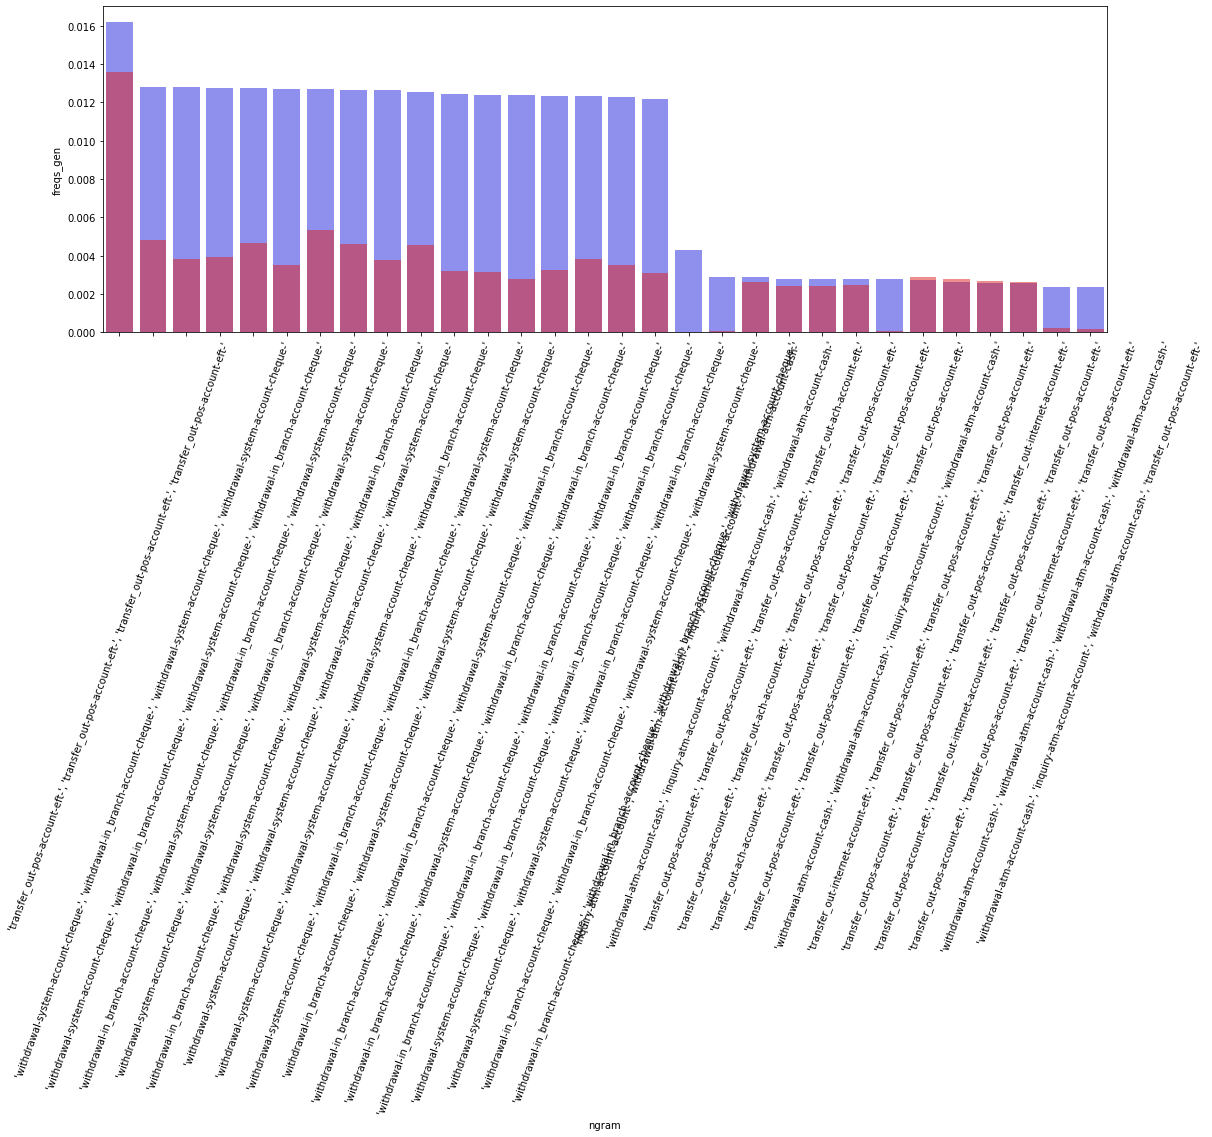

In [149]:
plt.figure(figsize=(18,6))
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_real", color="b", alpha=0.5)
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_gen", color="r", alpha=0.5)
for item in barplt.get_xticklabels():
    item.set_rotation(70)

In [216]:
for x in counts.items(): break

In [217]:
x[1]

6

In [218]:
ngram_seq

[('deposit-in_branch-cheque-account-',
  'transfer_in-atm-account-account-',
  'deposit-in_branch-cheque-account-',
  'deposit-system-cheque-account-'),
 ('transfer_in-atm-account-account-',
  'deposit-in_branch-cheque-account-',
  'deposit-system-cheque-account-',
  'transfer_out-pos-account-eft-'),
 ('deposit-in_branch-cheque-account-',
  'deposit-system-cheque-account-',
  'transfer_out-pos-account-eft-',
  'deposit-in_branch-cheque-account-'),
 ('deposit-system-cheque-account-',
  'transfer_out-pos-account-eft-',
  'deposit-in_branch-cheque-account-',
  'deposit-system-cheque-account-'),
 ('transfer_out-pos-account-eft-',
  'deposit-in_branch-cheque-account-',
  'deposit-system-cheque-account-',
  'deposit-remote_capture-cheque-account-'),
 ('deposit-in_branch-cheque-account-',
  'deposit-system-cheque-account-',
  'deposit-remote_capture-cheque-account-',
  'inquiry-pos-account-account-')]

# tcode pair occurs - older

In [297]:
gen_len = 80

In [298]:
gen = gen_df

In [299]:
import pickle
ds_version = "14355x80x8-la_newdate"
with open("data/rows_in_seqs_{}.pickle".format(ds_version), "rb") as f:
    rows_in_seqs = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/rows_in_seqs_14355x80x8-la_newdate.pickle'

In [ ]:
real_seq_starts = [row[0] for row in rows_in_seqs]

In [ ]:
gen_tcodes = np.array(gen["tcode"].apply(fn))
gen_tcodes

In [23]:
real_tcodes = np.array(real_df["tcode"].apply(fn))
real_tcodes

array([ 3,  2,  3, ..., 13,  0,  0])

In [25]:
seq = real_tcodes[real_seq_starts[0]:real_seq_starts[1]]
seq

array([ 3,  2,  3,  0,  2,  3,  0,  2, 13,  0,  2, 13,  0,  2, 13, 11,  0,
        7,  2, 13, 11,  0,  7,  2, 13, 11,  0,  7,  2, 13, 11, 13,  0,  7,
        2, 13, 13, 11,  0, 13,  7, 13, 13, 13,  2, 13, 13, 13, 13, 11,  0,
        7,  2,  3, 11,  0,  7,  2,  3, 11,  0,  7,  2, 13, 11,  0,  7,  2,
       13, 13, 11,  0,  7,  2,  3, 13, 11,  0,  7,  2])

In [48]:
counts_real = {}
for seq_i in range(len(real_seq_starts)-1):
    seq = real_tcodes[real_seq_starts[seq_i]:real_seq_starts[seq_i+1]]
    for i in range(len(seq)-1):
        pair = tuple(seq[i:i+2])
        counts_real[pair] = counts_real.get(pair, 0) + 1    
        


In [35]:
counts_real

NameError: name 'counts_real' is not defined

In [30]:
len(gen_tcodes) //80

14355

In [32]:
counts_gen = {}
for seq_i in range(len(gen_tcodes) //gen_len):
    
    seq = gen_tcodes[gen_len*seq_i :gen_len*(seq_i +1) ]
    for i in range(len(seq)-1):
        pair = tuple(seq[i:i+2])
        counts_gen[pair] = counts_gen.get(pair, 0) + 1    
        


In [33]:
import seaborn as sns

<BarContainer object of 224 artists>

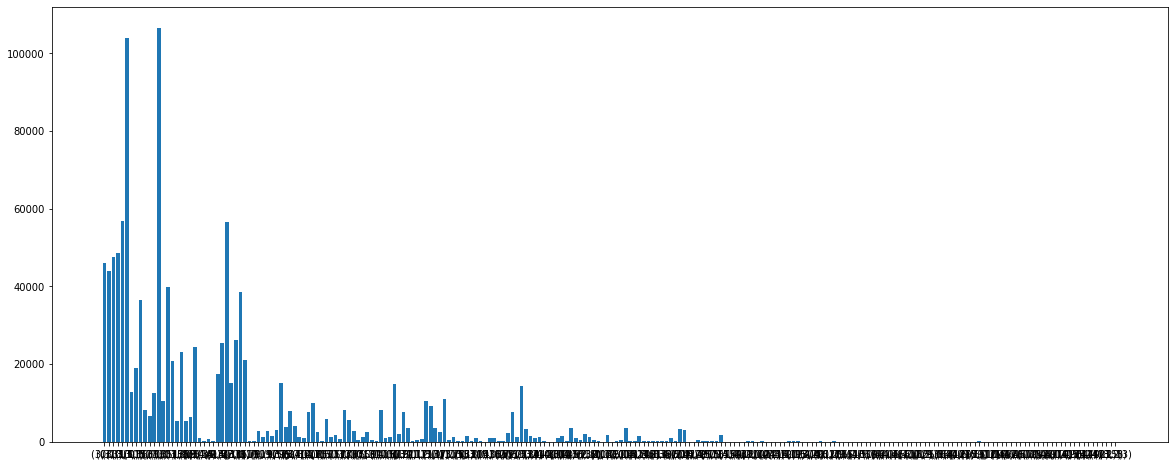

In [45]:
plt.figure(figsize=(20,8))
plt.bar(lbls, vals)

In [43]:
lbls_g, vals_g = zip(*counts_gen.items())
lbls_g = [str(x) for x in lbls_g]

In [46]:
len(lbls)

224

In [49]:
lbls_r, vals_r = zip(*counts_real.items())
lbls_r = [str(x) for x in lbls_r]

In [50]:
len(lbls)

186

In [51]:
all_counts = {}

for k, v in counts_real.items():
    all_counts[k] = v
    
for k, v in counts_gen.items():
    all_counts[k] = all_counts.get(k, 0) + v

In [56]:
info = sorted(all_counts.items(), key=lambda x: x[1], reverse=True)
len(info)

234

In [58]:
234/3

78.0

In [64]:
78/2

39.0

In [71]:
sum_r = sum(counts_real.values())
sum_g = sum(counts_gen.values())

density_r = dict([(k , v/sum_r ) for k,v in counts_real.items() ])
density_g = dict([(k , v/sum_g ) for k,v in counts_gen.items() ])

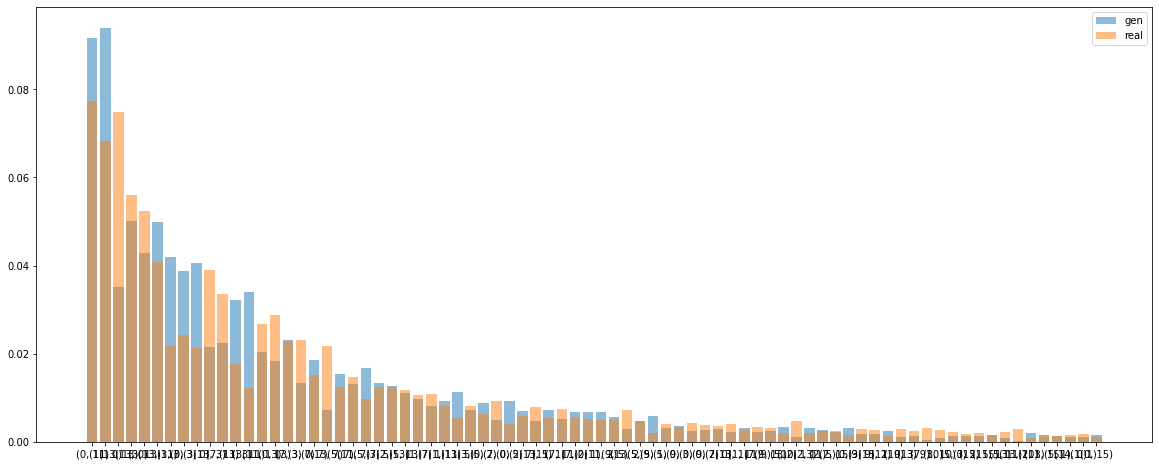

In [74]:
n_use = 78

keys = [k for k, _ in info[:n_use]]


gen_bars = [density_g.get(k, 0) for k in keys]
real_bars = [density_r.get(k, 0) for k in keys]

plt.figure(figsize=(20,8))


plt.bar([str(k) for k in keys], gen_bars, label="gen", alpha=0.5)
plt.bar([str(k) for k in keys], real_bars, label="real", alpha=0.5)

plt.legend()
plt.show()

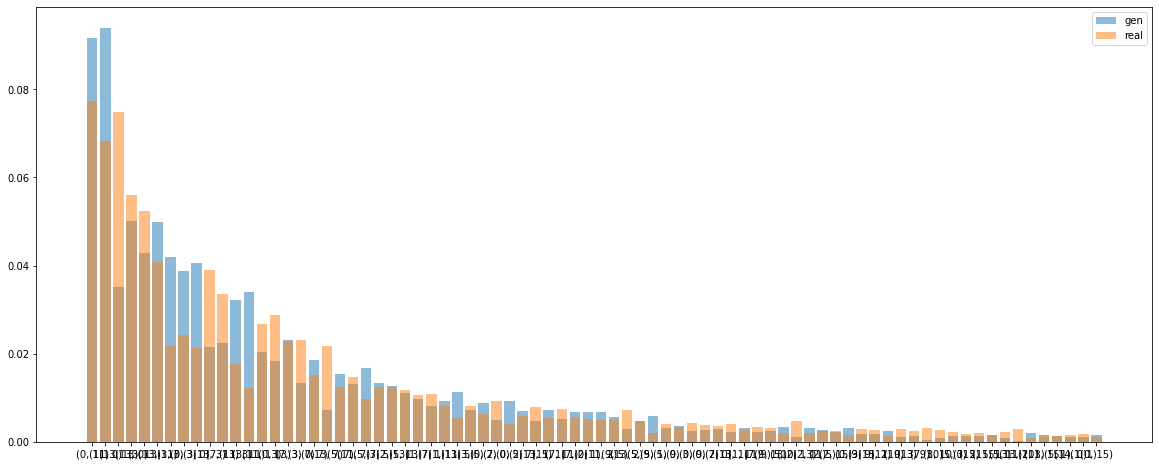

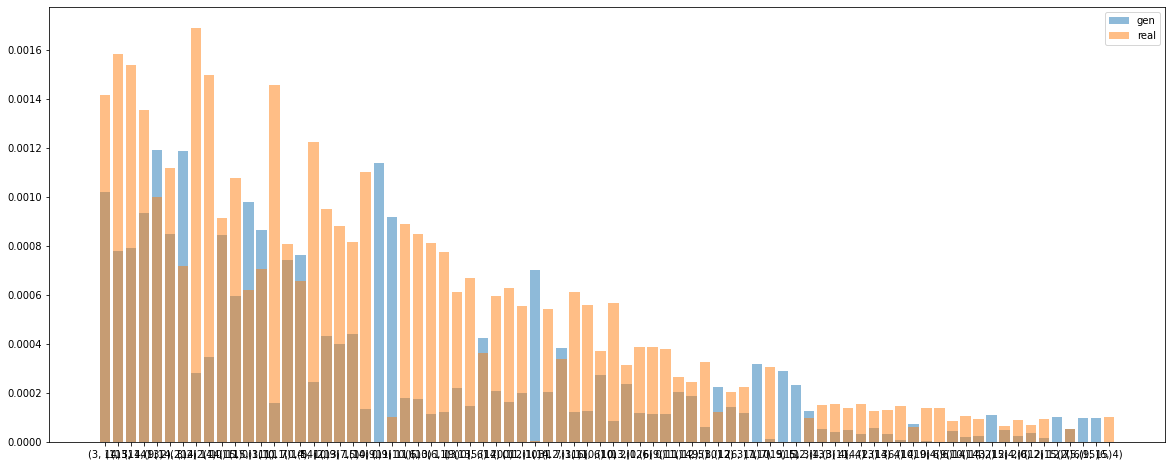

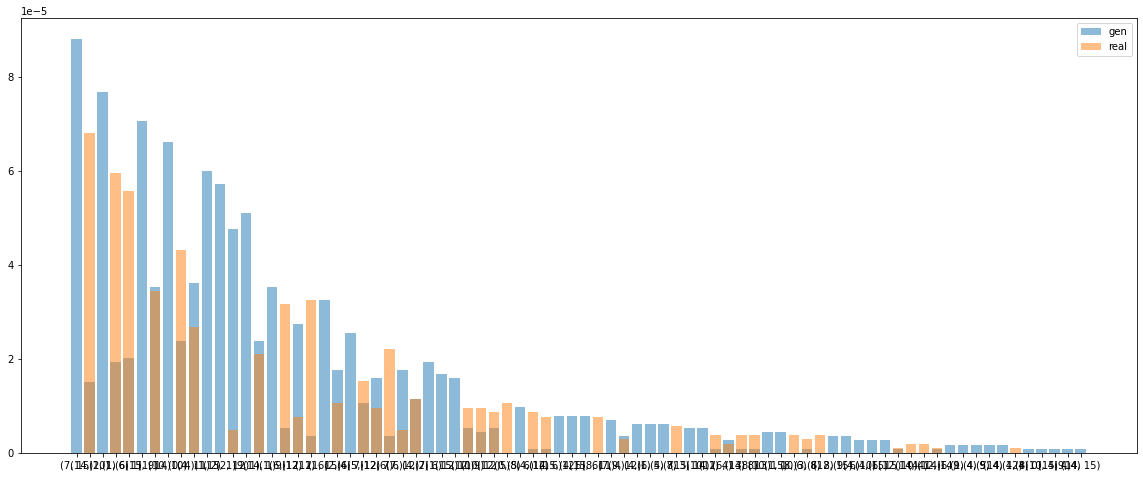

In [75]:
n_use = 78


for i in range(3):
    
    keys = [k for k, _ in info[n_use*i:n_use*(i+1)]]


    gen_bars = [density_g.get(k, 0) for k in keys]
    real_bars = [density_r.get(k, 0) for k in keys]

    plt.figure(figsize=(20,8))


    plt.bar([str(k) for k in keys], gen_bars, label="gen", alpha=0.5)
    plt.bar([str(k) for k in keys], real_bars, label="real", alpha=0.5)

    plt.legend()
    plt.show()